In [1]:
### Packages
rm(list=ls())
graphics.off()
library(xts)
library(zoo)
library(ConnectednessApproach)
library(tseries)
library(FinTS)
library(urca)
library(corrplot)
library(vars)
library(MTS)
library(readxl)
library(qgraph)
library(tidyverse)
library(lubridate)
library(RColorBrewer)
library(ggthemes)
# library(ggcorrplot2)
library(psych)
library(caret)
library(ggplot2)
library(tidyr)
library(quantreg)
library(readr)
library(scales)
library(waveslim)
library(showtext)
library(scales)
library(pheatmap)
library(dplyr)
library(lubridate)
library(tseries)
library(urca)

载入需要的程序包：zoo


载入程序包：‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Please cite as: 


 Gabauer, David (2022). ConnectednessApproach.

 R package version 1.0.0. https://CRAN.R-project.org/package=ConnectednessApproach 


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

corrplot 0.95 loaded

载入需要的程序包：MASS

载入需要的程序包：strucchange

载入需要的程序包：sandwich

载入需要的程序包：lmtest


载入程序包：‘vars’


The following object is masked from ‘package:ConnectednessApproach’:

    VAR



载入程序包：‘MTS’


The following object is masked from ‘package:vars’:

    VAR


The following object is masked from ‘package:FinTS’:

    apca


The following object is masked from ‘package:ConnectednessApproach’:

    VAR


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4

In [8]:
data <- read.csv('/Users/femicind/Documents/Jupyter/16 AI/data_level.csv')
data_ln <- read.csv('/Users/femicind/Documents/Jupyter/16 AI/data_ln.csv')

data_level <- data
data_log_returns <- data_ln
data_level$Date <- as.Date(data_level$Date, format = "%Y/%m/%d")

level_log_returns <- function(class, pdf_name){
    pdf_path <- paste('/Users/femicind/Documents/Jupyter/16 AI/output/', pdf_name, sep = "")
    pdf(pdf_path, width = 7, height = 4)
    par(las = 1)
    par(pin = c(5.5, 2.5))

    d_start <- as.Date("2022-01-01")
    d_end <- max(data_level$Date)
    year_ticks <- seq(from = d_start, to = d_end, by = "year")
    labels <- format(year_ticks, "%Y")

    plot(data_level$Date, data_level[,class], type = "l", xaxt = "n", yaxs = "i", xaxs = "i",
         main = class, cex.main = 2, cex.axis = 1.2, xlab = "", ylab = "", lwd = 1, col = "darkblue", lty = 1)  
    axis.Date(1, at = year_ticks, labels = labels, cex.axis = 1.2)
    par(las = 1)
    par(new=TRUE)
    plot(data_level$Date, data_log_returns[,class], type = "l", yaxs = "i", xaxs = "i", 
         ylim = c(-20, 20), xlab = "", ylab = "", axes=FALSE, lwd = 1, col = "skyblue", lty = 2)  
    axis(side = 4, at = c(-20, -10, 0, 10, 20), labels = c(-20, -10, 0, 10, 20), cex.axis = 1.2)
    legend("topleft", legend=c("Price", "Return"), col=c("darkblue", "skyblue"), lwd=1, lty=c(1, 2))
    dev.off()
}

level_log_returns("SDI", "SDI.pdf")
level_log_returns("SSEC", "SSEC.pdf")
level_log_returns("US500", "US500.pdf")
level_log_returns("VIX", "VIX.pdf")


pdf 
  2

pdf 
  2

pdf 
  2

pdf 
  2

In [9]:
data <- read.csv('/Users/femicind/Documents/Jupyter/16 AI/data_AIlevel.csv')
data$Date <- as.Date(data$Date, format = "%Y/%m/%d")
pdf('/Users/femicind/Documents/Jupyter/16 AI/output/AISAI.pdf', width = 7, height = 4)
par(las = 1)
par(pin = c(5.5, 2.5))


d_start <- as.Date("2022-01-01")
d_end <- max(data$Date)
year_ticks <- seq(from = d_start, to = d_end, by = "year")
labels <- format(year_ticks, "%Y")

plot(data$Date, data$AISAI, type = "l", xaxt = "n", yaxs = "i", xaxs = "i",
     main = "AISAI", cex.main = 2, cex.axis = 1.2, xlab = "", ylab = "", lwd = 1, col = "darkblue", lty = 1)  
axis.Date(1, at = year_ticks, labels = labels, cex.axis = 1.2)
par(las = 1)
par(new=TRUE)
legend("topleft", legend="Level", col="darkblue", lwd=1, lty=1)
dev.off()

pdf 
  2

In [70]:
data <- read.csv('/Users/femicind/Documents/Jupyter/16 AI/Robustness/data_ESG_plot.csv')
data$Date <- as.Date(data$Date, format = "%Y/%m/%d")
pdf('/Users/femicind/Documents/Jupyter/16 AI/Robustness/ESG.pdf', width = 7, height = 4)
par(las = 1)
par(pin = c(5.5, 2.5))


d_start <- as.Date("2022-01-01")
d_end <- max(data$Date)
year_ticks <- seq(from = d_start, to = d_end, by = "year")
labels <- format(year_ticks, "%Y")

plot(data$Date, data$ESG, type = "l", xaxt = "n", yaxs = "i", xaxs = "i",
     main = "ESG", cex.main = 2, cex.axis = 1.2, xlab = "", ylab = "", lwd = 1, col = "darkblue", lty = 1)  
axis.Date(1, at = year_ticks, labels = labels, cex.axis = 1.2)
par(las = 1)
par(new=TRUE)
plot(data$Date, data$ESGln, type = "l", yaxs = "i", xaxs = "i", 
         ylim = c(-20, 20), xlab = "", ylab = "", axes=FALSE, lwd = 1, col = "skyblue", lty = 2)  
    axis(side = 4, at = c(-20, -10, 0, 10, 20), labels = c(-20, -10, 0, 10, 20), cex.axis = 1.2)
    legend("topleft", legend=c("Price", "Return"), col=c("darkblue", "skyblue"), lwd=1, lty=c(1, 2))
dev.off()

pdf 
  2

In [10]:
### Descriptive Statistics
data <- read.csv('/Users/femicind/Documents/Jupyter/16 AI/data.csv')
DATA <- data
DATA = na.omit(DATA)
DATE = as.Date(as.character(DATA[,1]), format = "%Y/%m/%d")
DATA1 = DATA[,-1]
DATA11 = xts(x = DATA1, order.by = DATE)
return = as.zoo(DATA11)
sum_stat = SummaryStatistics(return, portmanteau="Ljung-Box", correlation="kendall", nlag=10)
sum_stat
write(sum_stat,"/Users/femicind/Documents/Jupyter/16 AI/output/sum_stat.csv")

The following statistics are used:

          Skewness: D'Agostino, R.B. (1970). Transformation to Normality of the Null Distribution of G1. Biometrika, 57, 3, 679-681.

          Excess Kurtosis: Anscombe, F.J., Glynn, W.J. (1983) Distribution of kurtosis statistic for normal statistics. Biometrika, 70, 1, 227-234

          Normality test: Jarque, C. M., & Bera, A. K. (1980). Efficient tests for normality, homoscedasticity and serial independence of regression residuals. Economics Letters, 6(3), 255-259.

          ERS unit-root test: Elliott, G., Rothenberg, T. J., & Stock, J. H. (1996). Efficient Tests for an Autoregressive Unit Root. Econometrica, 64(4), 813-836.

          Weighted Portmanteau statistics: Fisher, T. J., & Gallagher, C. M. (2012). New weighted portmanteau statistics for time series goodness of fit testing. Journal of the American Statistical Association, 107(498), 777-787.

          



,SDI,AISAI,SSEC,US500,VIX
Mean,-0.028,0.018,-0.010,0.026,-0.068
,(0.476),(0.386),(0.763),(0.448),(0.777)
Variance,1.402,0.383,1.033,1.071,53.365
Skewness,0.278***,0.753***,0.088,-0.254***,1.217***
,(0.001),(0.000),(0.270),(0.002),(0.000)
Ex.Kurtosis,7.048***,-0.806***,7.660***,1.934***,7.874***
,(0.000),(0.000),(0.000),(0.000),(0.000)
JB,1934.854***,112.868***,2272.708***,154.775***,2628.957***
,(0.000),(0.000),(0.000),(0.000),(0.000)
ERS,-3.491,0.117,-3.417,-4.171,-6.548


In [11]:
#correlations
data_corr <- data[, -1] 
corr <- data_corr
res <- cor(corr)
res
# write(res,"corr_energy.csv")
# pdf('/Users/femicind/Documents/Jupyter/14 2025统计建模/data and code/output/Unconditional correlations.pdf')
# corrplot.mixed(res, lower.col = "black", number.cex = 0.8, tl.cex = 0.6, mar = c(0.5,0,0.8,0)) 
# dev.off()

,SDI,AISAI,SSEC,US500,VIX
SDI,1.00000000,0.0450810491,0.91702161,0.05534794,-0.0549492924
AISAI,0.04508105,1.0000000000,0.03631795,0.01284597,-0.0001291402
SSEC,0.91702161,0.0363179516,1.00000000,0.06932026,-0.0645852099
US500,0.05534794,0.0128459702,0.06932026,1.00000000,-0.7355335950
VIX,-0.05494929,-0.0001291402,-0.06458521,-0.73553359,1.0000000000


In [6]:

# ---- 1. Data Import ----
data <- read_csv('/Users/femicind/Documents/Jupyter/16 AI/data_AI.csv', locale = locale(encoding = "GB18030"))
keywords <- names(data)[-1] # First col: Date

# ---- 2. Filter Variables with Too Many Zeros ----
nonzero_ratio <- function(x) mean(x != 0)
keep_vars <- sapply(data[, keywords], nonzero_ratio) > 0.05
keywords_filtered <- keywords[keep_vars]
data_filtered <- data[, c("Date", keywords_filtered)]

# ---- 3. Log Transform ----
data_log <- data_filtered
data_log[, -1] <- log1p(data_log[, -1])

# ---- 4. Standardization ----
data_scaled <- data_log
data_scaled[, -1] <- scale(data_log[, -1])

# ---- 5. Correlation Heatmap (English Title, PDF Output) ----
pdf("/Users/femicind/Documents/Jupyter/16 AI/output/corr_heatmap.pdf", width = 10, height = 10)
corr_mat <- cor(data_scaled[, -1], use = "pairwise.complete.obs")
corrplot::corrplot(
  corr_mat, method = "color", order = "hclust", tl.cex = 0.5, 
  title = "Correlation Matrix Heatmap"
)
dev.off()

# ---- 6. KMO & Bartlett Tests ----
KMO_result <- KMO(data_scaled[, -1]); print(KMO_result)
bartlett_result <- cortest.bartlett(data_scaled[, -1]); print(bartlett_result)

# ---- 7. Descriptive Statistics ----
summary_stats <- summary(data_scaled[, -1]); print(summary_stats)

# ---- 8. PCA ----
pca_res <- psych::principal(data_scaled[, -1], nfactors = 3, rotate = "none", scores = TRUE)

# ---- 9. Scree Plot (English Title, PDF Output) ----
pdf("/Users/femicind/Documents/Jupyter/16 AI/output/screeplot.pdf", width = 8, height = 6)
plot(
  pca_res$values, type = "b", pch = 21, frame = FALSE, 
  main = "Scree Plot of Eigenvalues", 
  xlab = "Principal Component", ylab = "Eigenvalue"
)
abline(h = 1, col = "red", lty = 2)
dev.off()

# ---- 10. Output Variance Explained ----
print("Variance explained by the first 3 PCs:")
print(pca_res$Vaccounted)

# ---- 11. Loadings Heatmap (English Title, PNG Output, USE filename!) ----
pheatmap(
  as.matrix(pca_res$loadings[, 1:3]), 
  cluster_rows = TRUE, cluster_cols = FALSE, 
  main = "Loadings Heatmap (PC1-PC3)",
  filename = "/Users/femicind/Documents/Jupyter/16 AI/output/loadings_heatmap_PC1_PC3.png",
  width = 8, height = 11
)

# ---- 12. Principal Component Scores ----
pc_scores <- as.data.frame(pca_res$scores)
colnames(pc_scores) <- c("PC1", "PC2", "PC3")
pc_scores$Date <- data_scaled$Date

# ---- 13. Weighted Index (Variance-explained) ----
var_explained <- pca_res$Vaccounted[2, 1:3]
var_explained <- var_explained / sum(var_explained)
cat("Variance-explained weights for composite index:\n")
cat(paste0("PC1: ", round(var_explained[1], 4), 
           ", PC2: ", round(var_explained[2], 4), 
           ", PC3: ", round(var_explained[3], 4), "\n"))
pc_scores$AI_sentiment_weighted <- 
  pc_scores$PC1 * var_explained[1] +
  pc_scores$PC2 * var_explained[2] +
  pc_scores$PC3 * var_explained[3]

# ---- 14. Descriptive stats for scores ----
summary(pc_scores[, c("PC1", "PC2", "PC3", "AI_sentiment_weighted")])
print("Skewness:"); print(apply(pc_scores[, c("PC1", "PC2", "PC3", "AI_sentiment_weighted")], 2, psych::skew))
print("Kurtosis:"); print(apply(pc_scores[, c("PC1", "PC2", "PC3", "AI_sentiment_weighted")], 2, psych::kurtosi))

# ---- 15. RMSR ----
cat("Root Mean Square Residual (RMSR):\n")
print(pca_res$rms)

# ---- 16. Plot Main Indices Over Time (English Title, PDF Output, legend top-right, custom order, no grid) ----
plot_df <- pc_scores %>%
  pivot_longer(cols = c("AI_sentiment_weighted","PC1", "PC2", "PC3"),
               names_to = "Legend", values_to = "Value")

plot_df$Index <- factor(
  plot_df$Index,
  levels = c("AI_sentiment_weighted", "PC1", "PC2", "PC3")
)

pdf("/Users/femicind/Documents/Jupyter/16 AI/output/AI_sentiment_indices_time_series.pdf", width = 9, height = 7)

# 1. 先画PC1/PC2/PC3
plot_df$Index <- factor(plot_df$Index, levels = c("AI_sentiment_weighted", "PC1", "PC2", "PC3"))
df_others <- plot_df %>% filter(Index != "AI_sentiment_weighted")
df_main   <- plot_df %>% filter(Index == "AI_sentiment_weighted")

p <- ggplot() +
  # 先画其他主成分
  geom_line(
    data = df_others, 
    aes(x = as.Date(Date), y = Value, color = Index), size = 0.5
  ) +
  # 后画黑色加权线
  geom_line(
    data = df_main, 
    aes(x = as.Date(Date), y = Value, color = Index), size = 0.8
  ) +
  labs(
    title = "AI Societal Sentiment Indices: First Three Principal Components and Weighted Composite",
    x = "Date", y = "Index Value", color = "Legend"
  ) +
scale_y_continuous(
  limits = c(-4, 4),                    # y轴范围
  breaks = seq(-4, 4, by = 1),          # 主要刻度
  labels = scales::number_format(accuracy = 0.1)  # 格式化
)+
  scale_color_manual(
    values = c(
      "AI_sentiment_weighted" = "red",
      "PC1" = "orange",
      "PC2" = "skyblue",
      "PC3" = "green"
    ),
    labels = c(
      "AI_sentiment_weighted" = "Weighted Composite",
      "PC1" = "PC1",
      "PC2" = "PC2",
      "PC3" = "PC3"
    ),
    name = "Legend"
  ) +
  theme_bw(base_size = 13) +
  theme(
    panel.grid = element_blank(),
    legend.position = c(0.87, 0.85),
    legend.background = element_rect(fill = "transparent", color = NA),  # 透明
    legend.title = element_text(size = 10, face = "bold"),
    legend.text = element_text(size = 12)
  )

print(p)
dev.off()

# ---- 17. Save Result ----
write_csv(pc_scores, "/Users/femicind/Documents/Jupyter/16 AI/output/AI_sentiment_index_PCs.csv")

Rows: 1492 Columns: 73
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Date
dbl (72): Artificial Intelligence, AI, Intelligence, Machine Learning, Deep ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“conversion failure on 'PanGu-α' in 'mbcsToSbcs': for α (U+03B1)”
Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“conversion failure on 'PanGu-α' in 'mbcsToSbcs': for α (U+03B1)”


pdf 
  2

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = data_scaled[, -1])
Overall MSA =  0.96
MSA for each item = 
     Artificial Intelligence                           AI 
                        0.90                         0.96 
                Intelligence             Machine Learning 
                        0.98                         0.98 
               Deep Learning  Natural Language Processing 
                        0.97                         0.98 
              Neural Network                    Algorithm 
                        0.97                         0.98 
                 Data Mining           Intelligent System 
                        0.98                         0.80 
                     ChatGPT                         Bard 
                        0.96                         0.91 
                      Gemini                         Sora 
                        0.91                         0.95 
                      Claude                      Mistral 
      

R was not square, finding R from data



$chisq
[1] 213740.7

$p.value
[1] 0

$df
[1] 2485

 Artificial Intelligence       AI           Intelligence      Machine Learning 
 Min.   :-3.140475       Min.   :-1.7256   Min.   :-3.83524   Min.   :-3.7051  
 1st Qu.:-0.669091       1st Qu.:-0.8608   1st Qu.:-0.54351   1st Qu.:-0.5635  
 Median :-0.001944       Median :-0.2861   Median : 0.04332   Median : 0.2386  
 Mean   : 0.000000       Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.522326       3rd Qu.: 0.9960   3rd Qu.: 0.38396   3rd Qu.: 0.7885  
 Max.   : 4.165443       Max.   : 1.9956   Max.   : 7.76268   Max.   : 5.5985  
 Deep Learning     Natural Language Processing Neural Network    
 Min.   :-4.2871   Min.   :-3.28152            Min.   :-3.19844  
 1st Qu.:-0.6234   1st Qu.:-0.67584            1st Qu.:-0.66470  
 Median : 0.2672   Median : 0.02934            Median : 0.05846  
 Mean   : 0.0000   Mean   : 0.00000            Mean   : 0.00000  
 3rd Qu.: 0.8726   3rd Qu.: 0.73331            3rd Qu.: 0.7

pdf 
  2

[1] "Variance explained by the first 3 PCs:"
                             PC1        PC2       PC3
SS loadings           27.3995502 14.1817608 7.2283257
Proportion Var         0.3859092  0.1997431 0.1018074
Cumulative Var         0.3859092  0.5856523 0.6874597
Proportion Explained   0.5613553  0.2905525 0.1480922
Cumulative Proportion  0.5613553  0.8519078 1.0000000
Variance-explained weights for composite index:
PC1: 0.5614, PC2: 0.2906, PC3: 0.1481


      PC1               PC2               PC3          AI_sentiment_weighted
 Min.   :-1.3559   Min.   :-3.8342   Min.   :-1.9794   Min.   :-1.2623      
 1st Qu.:-0.9225   1st Qu.:-0.7642   1st Qu.:-1.0343   1st Qu.:-0.4744      
 Median :-0.2171   Median : 0.2199   Median : 0.3067   Median :-0.2805      
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000      
 3rd Qu.: 0.9095   3rd Qu.: 0.7663   3rd Qu.: 0.7402   3rd Qu.: 0.3749      
 Max.   : 2.1140   Max.   : 1.9674   Max.   : 2.0708   Max.   : 1.6250      

[1] "Skewness:"
                  PC1                   PC2                   PC3 
            0.4323535            -0.5960384            -0.1392639 
AI_sentiment_weighted 
            0.7025808 
[1] "Kurtosis:"
                  PC1                   PC2                   PC3 
           -1.2692277            -0.1298462            -1.2230558 
AI_sentiment_weighted 
           -0.6118168 
Root Mean Square Residual (RMSR):
[1] 0.05350396


Warning message:
“Unknown or uninitialised column: `Index`.”


ERROR: [1m[33mError[39m in `$<-`:[22m
[1m[22m[33m![39m Assigned data `factor(...)` must be compatible with existing data.
[31m✖[39m Existing data has 5968 rows.
[31m✖[39m Assigned data has 0 rows.
[36mℹ[39m Only vectors of size 1 are recycled.
[1mCaused by error in `vectbl_recycle_rhs_rows()`:[22m
[33m![39m Can't recycle input of size 0 to size 5968.


In [3]:
# 1. 读取数据
sd <- read_csv('/Users/femicind/Documents/Jupyter/16 AI/data_robustness_副本.csv')
ai <- read_csv('/Users/femicind/Documents/Jupyter/16 AI/data_0_robustness.csv')

# 2. 检查日期列名并统一
names(ai)[1] <- "Date"
names(sd)[1] <- "Date"

# 3. 转换为日期类型
ai$Date <- as.Date(ai$Date)
sd$Date <- as.Date(sd$Date)

# 4. 设置滚动窗口长度（如前7天，可调整）
roll_n <- 7

# 5. 用zoo的rollapply为每个AI指数日构造滚动均值
ai <- ai %>%
  arrange(Date) %>%
  mutate(AISAI = rollapply(AISAI, width = roll_n, align = "right", fill = NA, FUN = mean, na.rm = TRUE))

# 6. 对齐到可持续发展指数的交易日
result <- sd %>%
  left_join(ai[, c("Date", "AISAI")], by = "Date")

# 7. 检查并输出缺失
cat("交易日AI指数缺失天数：", sum(is.na(result$AISAI)), "\n")
head(result)

# 8. 如需导出
write_csv(result, "/Users/femicind/Documents/Jupyter/16 AI/AI_SD_merged_robustness.csv")


Rows: 929 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (1): SDI

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1492 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (1): AISAI

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


交易日AI指数缺失天数： 0 


Date,SDI,AISAI
<date>,<dbl>,<dbl>
2021-03-09,-2.0069802,-0.7133442
2021-03-10,0.4558390,-0.7126900
2021-03-11,2.6285945,-0.7113780
2021-03-12,0.6623057,-0.7106274
2021-03-15,-1.8299765,-0.7089490
2021-03-16,0.9176455,-0.7083734


In [52]:

# ---- 读入数据（请根据实际路径修改） ----
data <- read_csv('/Users/femicind/Documents/Jupyter/16 AI/data.csv')

# 确保变量名正确，假设是“AISAI”, “SDI”，如不是请修改
str(data)

# ---- ADF检验（单位根检验，越小越平稳） ----
adf_aisai <- adf.test(data$AISAI, alternative = "stationary")
adf_sdi   <- adf.test(data$SDI, alternative = "stationary")

print("ADF test for AISAI:"); print(adf_aisai)
print("ADF test for SDI:");   print(adf_sdi)

# ---- KPSS检验（零假设为平稳，越大越非平稳） ----
kpss_aisai <- kpss.test(data$AISAI)
kpss_sdi   <- kpss.test(data$SDI)

print("KPSS test for AISAI:"); print(kpss_aisai)
print("KPSS test for SDI:");   print(kpss_sdi)

# ---- 结果解读 ----
# 对于ADF：p值<0.05说明拒绝单位根假设，即序列平稳
# 对于KPSS：p值<0.05说明拒绝平稳假设，即序列非平稳

# 如果需要做一阶差分再检验
# data$AISAI_diff <- c(NA, diff(data$AISAI))
# data$SDI_diff   <- c(NA, diff(data$SDI))

# adf_aisai_diff <- adf.test(na.omit(data$AISAI_diff), alternative = "stationary")
# adf_sdi_diff   <- adf.test(na.omit(data$SDI_diff), alternative = "stationary")

# kpss_aisai_diff <- kpss.test(na.omit(data$AISAI_diff))
# kpss_sdi_diff   <- kpss.test(na.omit(data$SDI_diff))

# print("ADF test for AISAI (diff):"); print(adf_aisai_diff)
# print("ADF test for SDI (diff):");   print(adf_sdi_diff)
# print("KPSS test for AISAI (diff):"); print(kpss_aisai_diff)
# print("KPSS test for SDI (diff):");   print(kpss_sdi_diff)


Rows: 1003 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (2): SDI, AISAI

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [1,003 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Date : chr [1:1003] "2021/3/9" "2021/3/10" "2021/3/11" "2021/3/12" ...
 $ SDI  : num [1:1003] 1.087 -0.364 1.032 -1.512 0.731 ...
 $ AISAI: num [1:1003] 1.0875 0.5938 0.5755 0.0994 0.1203 ...
 - attr(*, "spec")=
  .. cols(
  ..   Date = col_character(),
  ..   SDI = col_double(),
  ..   AISAI = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


Warning message in adf.test(data$AISAI, alternative = "stationary"):
“p-value smaller than printed p-value”
Warning message in adf.test(data$SDI, alternative = "stationary"):
“p-value smaller than printed p-value”


[1] "ADF test for AISAI:"

	Augmented Dickey-Fuller Test

data:  data$AISAI
Dickey-Fuller = -11.76, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary

[1] "ADF test for SDI:"

	Augmented Dickey-Fuller Test

data:  data$SDI
Dickey-Fuller = -9.2173, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary



Warning message in kpss.test(data$AISAI):
“p-value greater than printed p-value”
Warning message in kpss.test(data$SDI):
“p-value greater than printed p-value”


[1] "KPSS test for AISAI:"

	KPSS Test for Level Stationarity

data:  data$AISAI
KPSS Level = 0.047163, Truncation lag parameter = 7, p-value = 0.1

[1] "KPSS test for SDI:"

	KPSS Test for Level Stationarity

data:  data$SDI
KPSS Level = 0.14624, Truncation lag parameter = 7, p-value = 0.1



In [2]:
# 读取数据集
data <- read.csv('/Users/femicind/Documents/Jupyter/16 AI/data_bdstest.csv')

# 提取各变量的时间序列
SDI <- data$SDI
AISAI <- data$AISAI


# 对 TCI 和其他各个变量分别进行 BDS 检验
bds_sdi <- bds.test(SDI, m = 4)
print(bds_sdi)

bds_aisai <- bds.test(AISAI, m = 4)
print(bds_aisai)


	 BDS Test 

data:  SDI 

Embedding dimension =  2 3 4 

Epsilon for close points =  0.5 1.0 1.5 2.0 

Standard Normal = 
      [ 0.5 ]  [ 1 ] [ 1.5 ]  [ 2 ]
[ 2 ]  2.1739 2.6935  3.4080 3.8964
[ 3 ]  1.8916 3.0920  4.1289 4.8621
[ 4 ]  3.1208 4.0856  4.9391 5.5806

p-value = 
      [ 0.5 ]  [ 1 ] [ 1.5 ] [ 2 ]
[ 2 ]  0.0297 0.0071   7e-04 1e-04
[ 3 ]  0.0586 0.0020   0e+00 0e+00
[ 4 ]  0.0018 0.0000   0e+00 0e+00



	 BDS Test 

data:  AISAI 

Embedding dimension =  2 3 4 

Epsilon for close points =  0.5 1.0 1.5 2.0 

Standard Normal = 
       [ 0.5 ]    [ 1 ]  [ 1.5 ]   [ 2 ]
[ 2 ] 148.7727 124.1658  96.4697 83.9173
[ 3 ] 252.7961 151.9428 105.5642 83.3028
[ 4 ] 462.7514 190.7956 116.9797 83.1104

p-value = 
      [ 0.5 ] [ 1 ] [ 1.5 ] [ 2 ]
[ 2 ]       0     0       0     0
[ 3 ]       0     0       0     0
[ 4 ]       0     0       0     0




In [3]:
data <- read.csv('/Users/femicind/Documents/Jupyter/16 AI/data_waveslim.csv')
max_sca <- floor(log(nrow(data), 2))
paste0("The maximum number of scales for your data is: ", max_sca)

[1] "The maximum number of scales for your data is: 9"

In [4]:
scales <- 9 # 不超过 max_sca
short <- c(1,2,3)  # 短期成分
medium <- c(4,5,6)
long <- c(7,8,9)   # 长期成分

In [5]:
w_data <- list(NULL)
for (i in 1:(scales + 1)){
  w_data[[i]] <- data
}
for (i in 1:ncol(data)){
  mra.out <- mra(as.numeric(data[,i]), J = scales, boundary = "periodic", method = "modwt")
  for (j in 1:(scales + 1)){
    w_data[[j]][,i] <- matrix(unlist(mra.out), nrow(data))[,j]
  }
}
rm(mra.out)
w_data

SDI,AISAI,SSEC,US500,VIX
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.81932190,-3.513409e-01,-0.73628078,0.34221982,-2.05819746
-0.09089123,7.137126e-02,-0.26997126,-0.49699910,0.08327795
0.97101238,6.941260e-02,1.04913935,0.35278571,2.06283211
0.02040380,-1.634305e-02,-0.25660195,-0.32830770,-1.66397839
-1.33226837,-1.391420e-02,-0.83820664,0.27104801,0.86287940
0.97245664,4.947852e-04,0.75820055,-0.30890708,0.86579473
-0.23727632,1.874594e-03,-0.28848123,0.68468008,-5.46676536
0.92980810,-5.656713e-04,0.63093322,-0.83450859,7.86980422
-2.09118443,3.070881e-03,-1.39697882,0.14141546,-1.51801036


In [6]:
if (length(short) == 1){
  data1 <- w_data[[short]]
} else {
  data1 <- w_data[[short[1]]]
  for (i in 2:length(short)){
    data1 <- data1 + w_data[[short[i]]]
  }
}
write.csv(data1,'/Users/femicind/Documents/Jupyter/16 AI/data_short_new.csv')

In [7]:
if (length(medium) == 1){
  data2 <- w_data[[medium]]
} else {
  data2 <- w_data[[medium[1]]]
  for (i in 2:length(medium)){
    data2 <- data2 + w_data[[medium[i]]]
  }
}
write.csv(data2,'/Users/femicind/Documents/Jupyter/16 AI/data_medium_new.csv')

In [8]:
if (length(long) == 1){
  data3 <- w_data[[long]]
} else {
  data3 <- w_data[[long[1]]]
  for (i in 2:length(long)){
    data3 <- data3 + w_data[[long[i]]]
  }
}
write.csv(data3,'/Users/femicind/Documents/Jupyter/16 AI/data_long_new.csv')

### 回归

#### 短期

In [9]:
### 
data <- read.csv('/Users/femicind/Documents/Jupyter/16 AI/data_short_new.csv')
y <- data$SDI
x <- data$AISAI
z1 <- data$SSEC
z2 <- data$US500
z3 <- data$VIX
# Set quantiles
quantiles <- 0.05 # Set the quantile interval
num <- 1 / quantiles - 1
h <- 0.05 # set the bandwidth
taus <- seq(from = quantiles, to = 1 - quantiles, by = quantiles) 
linear_model <- lm(y ~ x + z1 + z2 + z3, data = data)
summary(linear_model)
taus <- seq(0.05, 0.95, by = 0.05)
quantile_models <- list()
for (tau in taus) {
  model <- rq(y ~ x + z1 + z2 + z3, data = data, tau = tau, method = "br")
  print(summary(model, se = "ker"))
}


Call:
lm(formula = y ~ x + z1 + z2 + z3, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.70017 -0.27223 -0.00743  0.23774  2.11183 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.608e-17  1.432e-02   0.000    1.000    
x            9.636e-02  2.344e-01   0.411    0.681    
z1           1.068e+00  1.526e-02  69.971   <2e-16 ***
z2          -2.852e-03  2.202e-02  -0.130    0.897    
z3           9.647e-05  3.057e-03   0.032    0.975    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4364 on 924 degrees of freedom
Multiple R-squared:  0.8418,	Adjusted R-squared:  0.8411 
F-statistic:  1229 on 4 and 924 DF,  p-value: < 2.2e-16



Call: rq(formula = y ~ x + z1 + z2 + z3, tau = tau, data = data, method = "br")

tau: [1] 0.05

Coefficients:
            Value     Std. Error t value   Pr(>|t|) 
(Intercept)  -0.66551   0.02607  -25.52750   0.00000
x             0.45238   0.27071    1.67110   0.09504
z1            1.07836   0.02889   37.33276   0.00000
z2            0.00265   0.03668    0.07230   0.94238
z3           -0.00220   0.00593   -0.37024   0.71129

Call: rq(formula = y ~ x + z1 + z2 + z3, tau = tau, data = data, method = "br")

tau: [1] 0.1

Coefficients:
            Value     Std. Error t value   Pr(>|t|) 
(Intercept)  -0.52088   0.02225  -23.40757   0.00000
x             0.20822   0.28445    0.73201   0.46435
z1            1.07944   0.02638   40.92525   0.00000
z2           -0.01024   0.03192   -0.32085   0.74839
z3           -0.00058   0.00392   -0.14907   0.88153

Call: rq(formula = y ~ x + z1 + z2 + z3, tau = tau, data = data, method = "br")

tau: [1] 0.15

Coefficients:
            Value     Std. Error

Cox-Snell Pseudo R² for tau = 0.05 : 0.8632707 
Cox-Snell Pseudo R² for tau = 0.1 : 0.8427193 
Cox-Snell Pseudo R² for tau = 0.15 : 0.8344101 
Cox-Snell Pseudo R² for tau = 0.2 : 0.8304201 
Cox-Snell Pseudo R² for tau = 0.25 : 0.8271064 
Cox-Snell Pseudo R² for tau = 0.3 : 0.8253867 
Cox-Snell Pseudo R² for tau = 0.35 : 0.8243297 
Cox-Snell Pseudo R² for tau = 0.4 : 0.8241626 
Cox-Snell Pseudo R² for tau = 0.45 : 0.8252339 
Cox-Snell Pseudo R² for tau = 0.5 : 0.826894 
Cox-Snell Pseudo R² for tau = 0.55 : 0.8281999 
Cox-Snell Pseudo R² for tau = 0.6 : 0.8285664 
Cox-Snell Pseudo R² for tau = 0.65 : 0.8289124 
Cox-Snell Pseudo R² for tau = 0.7 : 0.8287245 
Cox-Snell Pseudo R² for tau = 0.75 : 0.8256781 
Cox-Snell Pseudo R² for tau = 0.8 : 0.8200129 
Cox-Snell Pseudo R² for tau = 0.85 : 0.8205249 
Cox-Snell Pseudo R² for tau = 0.9 : 0.8227026 
Cox-Snell Pseudo R² for tau = 0.95 : 0.8250713 


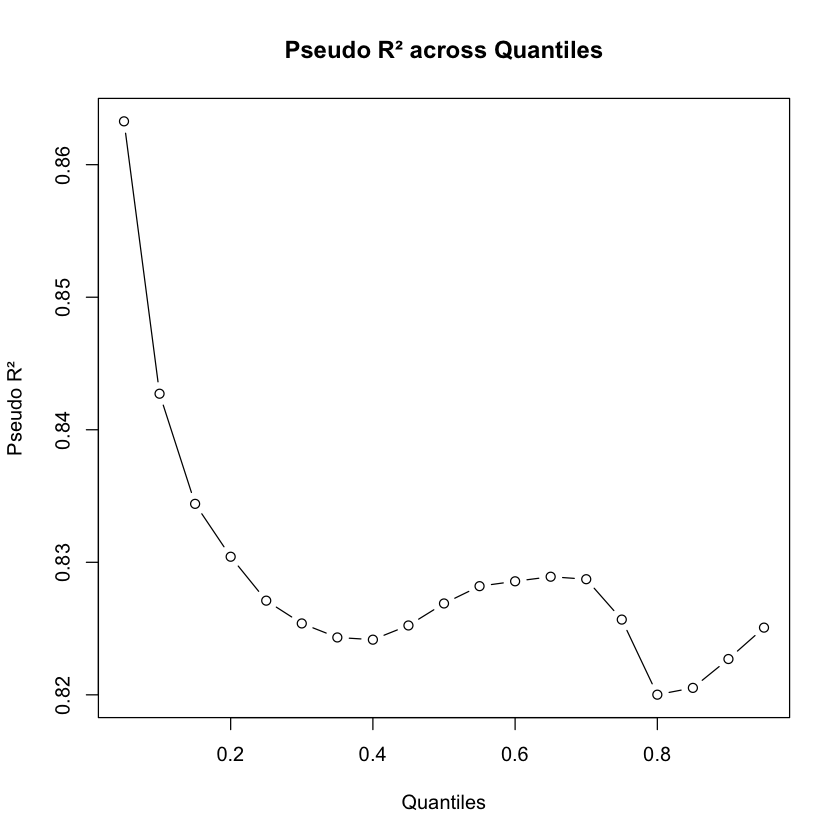

In [10]:
#########_R^2_###########

# 设置分位数
quantiles <- 0.05  # 设置分位数间隔
taus <- seq(from = quantiles, to = 1 - quantiles, by = quantiles)

# 初始化伪 R² 列表
pseudo_r2 <- numeric(length(taus))
n <- nrow(data)  # 样本大小

# 循环遍历每个分位数，拟合分位数回归模型，并计算 Cox-Snell 伪 R²
for (i in seq_along(taus)) {
  tau <- taus[i]
  
  # 拟合分位数回归模型
  model <- rq(y ~ x + z1 + z2 +z3, data = data, tau = tau, method = "br")
  
  # 拟合截距模型（null model）
  null_model <- rq(y ~ 1, data = data, tau = tau)
  
  # 计算似然值
  full_loglik <- logLik(model)
  null_loglik <- logLik(null_model)
  
  # Cox-Snell 伪 R²
  pseudo_r2[i] <- 1 - exp((as.numeric(null_loglik) - as.numeric(full_loglik)) * 2 / n)
  
  # 输出伪 R²
  cat("Cox-Snell Pseudo R² for tau =", tau, ":", pseudo_r2[i], "\n")
}

# 绘制伪 R² 随分位数变化的图
plot(taus, pseudo_r2, type = "b", xlab = "Quantiles", ylab = "Pseudo R²",
     main = "Pseudo R² across Quantiles")
# pdf('/Users/femicind/Documents/Jupyter/15 中国能源/data and code/output/QR/TCIT_R2.pdf', width = 7, height = 5)
# plot(taus, pseudo_r2, type = "b", xlab = "Quantiles", ylab = "Pseudo R²",
#      main = "Pseudo R² across Quantiles")
# dev.off()

In [11]:
QR.coef <- summary(rq(y ~ x + z1 + z2 + z3, tau = taus, ci = F), se = "ker") 
for (i in 1:num){
  QR.coef[[i]] <- QR.coef[[i]]$coefficients
}
QR.pval <- rep(NA, num)
for (i in 1:num){
  QR.pval[i] <- QR.coef[[i]][2,4]
}
QR.coef1 <- rep(NA, num)
for (i in 1:num){
  QR.coef1[i] <- QR.coef[[i]][2,1]
}
QR.coef <- QR.coef1
rm(QR.coef1)
QR.coef

[1]  0.452375856  0.208216638  0.108023723 -0.089594430 -0.173731362
 [6] -0.146069659  0.003538749  0.116942561  0.091225746  0.040710725
[11]  0.030272578  0.230818377 -0.018936446  0.133863761  0.109619862
[16] -0.160626351 -0.225746061 -0.246772035  0.188843031

In [12]:
# Add QQR Function
lprq <- function(x, y, z1, z2, z3, m = num, tau = .5) {
  yt <- y
  xt <- x
  z1t <- z1
  z2t <- z2
  z3t <- z3  
  xx <- seq(min(xt), max(xt), length = m)
  pv <- xx
  dv <- xx
  Fn <- xt
  for (i in 1:length(xt)) {
    Fn[i] <- length(which(xt < xt[i])) / length(xt)
  }
  
  for (i in 1:length(xx)) {
    zt <- xt - xx[i]
    wx <-
      dnorm((Fn - taus[i]) / h) # solve the gaussian kernal as the weight
    r <-
      summary(rq(yt ~ zt+z1t+z2t+z3t,
                 weights = wx,
                 tau = tau,
                 ci = F), se = "ker")  # FALSE method = "br",
    pv[i] <- r$coefficients[2, 4]
    dv[i] <- r$coefficients[2, 1]
  }
  list(xx = xx, pv = pv, dv = dv)
}

#Create a matrix to save the QQR estimates
QQR.coef <- as.data.frame(matrix(0, ncol = num, nrow = num))
QQR.pval <- as.data.frame(matrix(0, ncol = num, nrow = num))

# Run QQR in a loop and save estimates in matrix "QQR.coef"
for (i in 1:num) {
  res <- lprq(x = x,
              y = y,
              z1 = z1,
              z2 = z2,
              z3 = z3,
              m = num,
              tau = taus[i])
  QQR.coef[, i] <- res$dv 
  QQR.pval[, i] <- res$pv
}

#Save the QQR results
write.csv(QQR.coef, '/Users/femicind/Documents/Jupyter/16 AI/output/short_coef.csv', row.names = F)
write.csv(QQR.pval, '/Users/femicind/Documents/Jupyter/16 AI/output/short_pval.csv', row.names = F)

pdf 
  2

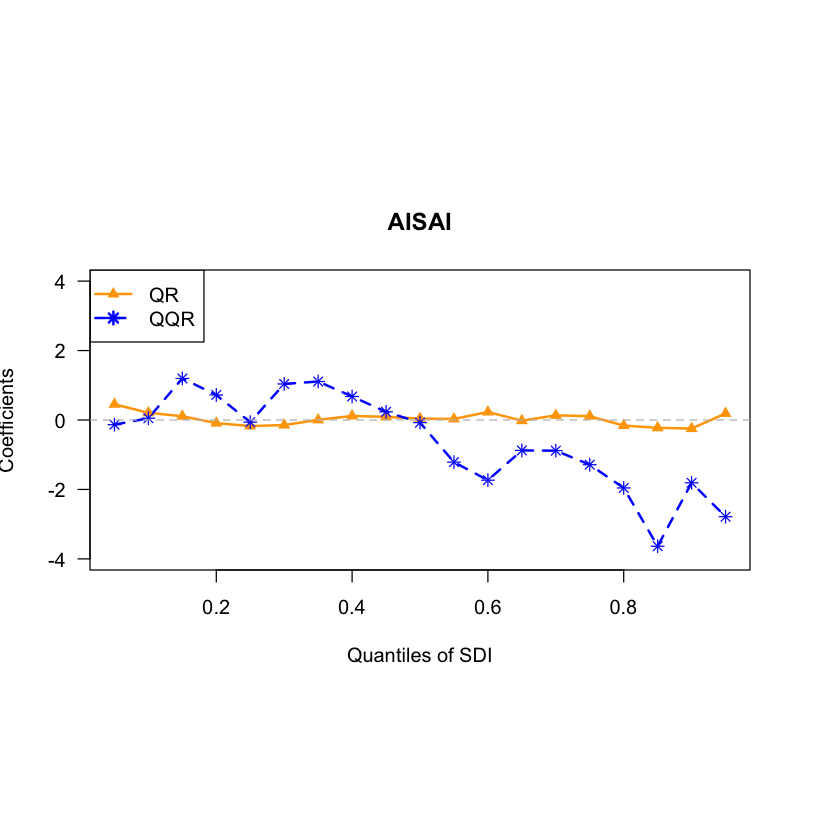

In [16]:
# Checking QQR
min <- min(c(QR.coef, colMeans(QQR.coef)))
max <- max(c(QR.coef, colMeans(QQR.coef)))
par(las = 1) 
par(pin = c(5.5, 2.5))
pdf('/Users/femicind/Documents/Jupyter/16 AI/output/short_AISAI.pdf', width = 7, height = 5)
par(las = 1) 
par(pin = c(5, 2.5))
plot(taus, QR.coef, type = "l", col = "orange", lwd=2, ylab = "Coefficients", xlab = "Quantiles of SDI", main = "AISAI", ylim = c(-4, 4))
lines(taus, colMeans(QQR.coef), type = "l", lwd=2, lty = 2, col = "blue")
points(taus, QR.coef, pch = 17, col = "orange")
points(taus, colMeans(QQR.coef), pch = 8, col = "blue")
abline(h = 0, col = "gray", lty = 2)
legend("topleft", legend=c("QR", "QQR"), col=c("orange", "blue"), lwd=2, lty = c(1, 2), pch = c(17,8))
dev.off()
plot(taus, QR.coef, type = "l", col = "orange", lwd=2, ylab = "Coefficients", xlab = "Quantiles of SDI", main = "AISAI", ylim = c(-4, 4))
lines(taus, colMeans(QQR.coef), type = "l", lwd=2, lty = 2, col = "blue")
points(taus, QR.coef, pch = 17, col = "orange")
points(taus, colMeans(QQR.coef), pch = 8, col = "blue")
abline(h = 0, col = "gray", lty = 2)
legend("topleft", legend=c("QR", "QQR"), col=c("orange", "blue"), lwd=2, lty = c(1, 2), pch = c(17,8))

#### 中期

In [17]:
### 
data <- read.csv('/Users/femicind/Documents/Jupyter/16 AI/data_medium_new.csv')
y <- data$SDI
x <- data$AISAI
z1 <- data$SSEC
z2 <- data$US500
z3 <- data$VIX
# Set quantiles
quantiles <- 0.05 # Set the quantile interval
num <- 1 / quantiles - 1
h <- 0.05 # set the bandwidth
taus <- seq(from = quantiles, to = 1 - quantiles, by = quantiles) 
linear_model <- lm(y ~ x + z1 + z2 + z3, data = data)
summary(linear_model)
taus <- seq(0.05, 0.95, by = 0.05)
quantile_models <- list()
for (tau in taus) {
  model <- rq(y ~ x + z1 + z2 + z3, data = data, tau = tau, method = "br")
  print(summary(model, se = "ker"))
}


Call:
lm(formula = y ~ x + z1 + z2 + z3, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39001 -0.10039 -0.00102  0.08697  0.54341 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.030e-17  4.723e-03   0.000   1.0000    
x           -2.553e-02  3.066e-02  -0.833   0.4051    
z1           1.051e+00  1.572e-02  66.833  < 2e-16 ***
z2          -9.682e-02  2.367e-02  -4.091 4.68e-05 ***
z3          -9.319e-03  4.036e-03  -2.309   0.0212 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.144 on 924 degrees of freedom
Multiple R-squared:  0.8378,	Adjusted R-squared:  0.8371 
F-statistic:  1193 on 4 and 924 DF,  p-value: < 2.2e-16



Call: rq(formula = y ~ x + z1 + z2 + z3, tau = tau, data = data, method = "br")

tau: [1] 0.05

Coefficients:
            Value     Std. Error t value   Pr(>|t|) 
(Intercept)  -0.22807   0.00829  -27.51751   0.00000
x            -0.03501   0.04291   -0.81589   0.41477
z1            0.91249   0.03116   29.28244   0.00000
z2           -0.18258   0.03481   -5.24456   0.00000
z3           -0.02605   0.00464   -5.61881   0.00000

Call: rq(formula = y ~ x + z1 + z2 + z3, tau = tau, data = data, method = "br")

tau: [1] 0.1

Coefficients:
            Value     Std. Error t value   Pr(>|t|) 
(Intercept)  -0.17777   0.00744  -23.88988   0.00000
x             0.01161   0.04026    0.28839   0.77312
z1            0.94524   0.03552   26.61266   0.00000
z2           -0.12650   0.03721   -3.39966   0.00070
z3           -0.02469   0.00461   -5.35970   0.00000

Call: rq(formula = y ~ x + z1 + z2 + z3, tau = tau, data = data, method = "br")

tau: [1] 0.15

Coefficients:
            Value     Std. Error

Cox-Snell Pseudo R² for tau = 0.05 : 0.8246134 
Cox-Snell Pseudo R² for tau = 0.1 : 0.8120964 
Cox-Snell Pseudo R² for tau = 0.15 : 0.8039062 
Cox-Snell Pseudo R² for tau = 0.2 : 0.7970432 
Cox-Snell Pseudo R² for tau = 0.25 : 0.794709 
Cox-Snell Pseudo R² for tau = 0.3 : 0.7957243 
Cox-Snell Pseudo R² for tau = 0.35 : 0.798108 
Cox-Snell Pseudo R² for tau = 0.4 : 0.8008931 
Cox-Snell Pseudo R² for tau = 0.45 : 0.8043409 
Cox-Snell Pseudo R² for tau = 0.5 : 0.8090573 
Cox-Snell Pseudo R² for tau = 0.55 : 0.8126392 
Cox-Snell Pseudo R² for tau = 0.6 : 0.8154994 
Cox-Snell Pseudo R² for tau = 0.65 : 0.8188592 
Cox-Snell Pseudo R² for tau = 0.7 : 0.8215702 
Cox-Snell Pseudo R² for tau = 0.75 : 0.8249814 
Cox-Snell Pseudo R² for tau = 0.8 : 0.8296841 
Cox-Snell Pseudo R² for tau = 0.85 : 0.8350069 
Cox-Snell Pseudo R² for tau = 0.9 : 0.8496034 
Cox-Snell Pseudo R² for tau = 0.95 : 0.8803537 


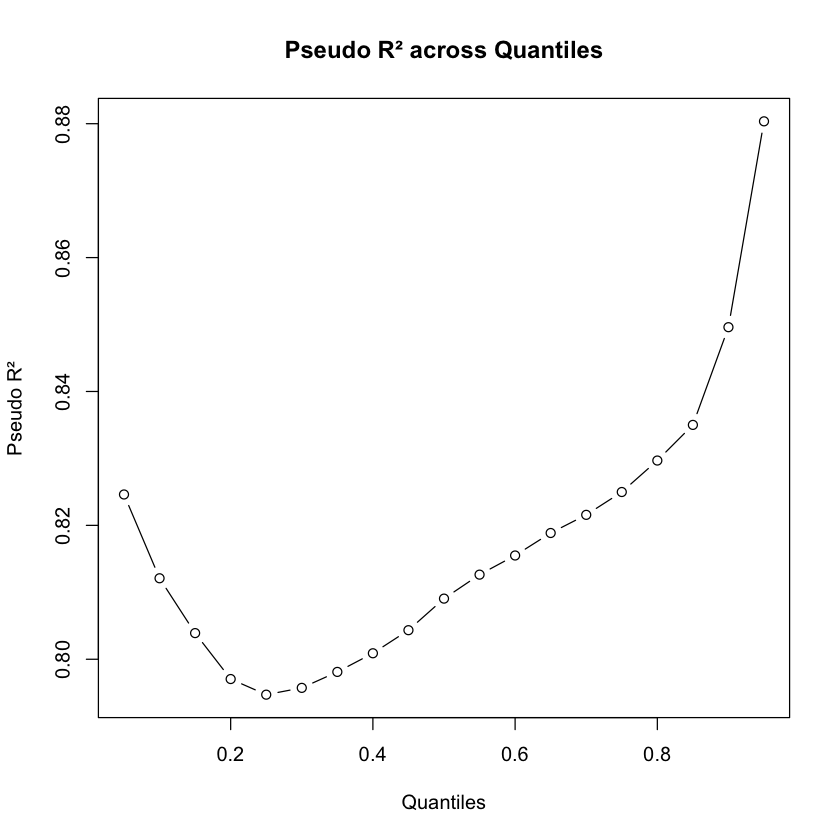

In [18]:
#########_R^2_###########

# 设置分位数
quantiles <- 0.05  # 设置分位数间隔
taus <- seq(from = quantiles, to = 1 - quantiles, by = quantiles)

# 初始化伪 R² 列表
pseudo_r2 <- numeric(length(taus))
n <- nrow(data)  # 样本大小

# 循环遍历每个分位数，拟合分位数回归模型，并计算 Cox-Snell 伪 R²
for (i in seq_along(taus)) {
  tau <- taus[i]
  
  # 拟合分位数回归模型
  model <- rq(y ~ x + z1 + z2 +z3, data = data, tau = tau, method = "br")
  
  # 拟合截距模型（null model）
  null_model <- rq(y ~ 1, data = data, tau = tau)
  
  # 计算似然值
  full_loglik <- logLik(model)
  null_loglik <- logLik(null_model)
  
  # Cox-Snell 伪 R²
  pseudo_r2[i] <- 1 - exp((as.numeric(null_loglik) - as.numeric(full_loglik)) * 2 / n)
  
  # 输出伪 R²
  cat("Cox-Snell Pseudo R² for tau =", tau, ":", pseudo_r2[i], "\n")
}

# 绘制伪 R² 随分位数变化的图
plot(taus, pseudo_r2, type = "b", xlab = "Quantiles", ylab = "Pseudo R²",
     main = "Pseudo R² across Quantiles")
# pdf('/Users/femicind/Documents/Jupyter/15 中国能源/data and code/output/QR/TCIT_R2.pdf', width = 7, height = 5)
# plot(taus, pseudo_r2, type = "b", xlab = "Quantiles", ylab = "Pseudo R²",
#      main = "Pseudo R² across Quantiles")
# dev.off()

In [19]:
QR.coef <- summary(rq(y ~ x + z1 + z2 + z3, tau = taus, ci = F), se = "ker") 
for (i in 1:num){
  QR.coef[[i]] <- QR.coef[[i]]$coefficients
}
QR.pval <- rep(NA, num)
for (i in 1:num){
  QR.pval[i] <- QR.coef[[i]][2,4]
}
QR.coef1 <- rep(NA, num)
for (i in 1:num){
  QR.coef1[i] <- QR.coef[[i]][2,1]
}
QR.coef <- QR.coef1
rm(QR.coef1)
QR.coef

[1] -0.035006379  0.011611589  0.014731205  0.041048015  0.077168544
 [6]  0.085574997  0.084355641  0.068229752  0.063219737  0.039675521
[11]  0.024429341  0.006269243 -0.001797516 -0.030762831 -0.065368399
[16] -0.078301659 -0.104985149 -0.142544194 -0.244303138

In [20]:
# Add QQR Function
lprq <- function(x, y, z1, z2, z3, m = num, tau = .5) {
  yt <- y
  xt <- x
  z1t <- z1
  z2t <- z2
  z3t <- z3  
  xx <- seq(min(xt), max(xt), length = m)
  pv <- xx
  dv <- xx
  Fn <- xt
  for (i in 1:length(xt)) {
    Fn[i] <- length(which(xt < xt[i])) / length(xt)
  }
  
  for (i in 1:length(xx)) {
    zt <- xt - xx[i]
    wx <-
      dnorm((Fn - taus[i]) / h) # solve the gaussian kernal as the weight
    r <-
      summary(rq(yt ~ zt+z1t+z2t+z3t,
                 weights = wx,
                 tau = tau,
                 ci = F), se = "ker")  # FALSE method = "br",
    pv[i] <- r$coefficients[2, 4]
    dv[i] <- r$coefficients[2, 1]
  }
  list(xx = xx, pv = pv, dv = dv)
}

#Create a matrix to save the QQR estimates
QQR.coef <- as.data.frame(matrix(0, ncol = num, nrow = num))
QQR.pval <- as.data.frame(matrix(0, ncol = num, nrow = num))

# Run QQR in a loop and save estimates in matrix "QQR.coef"
for (i in 1:num) {
  res <- lprq(x = x,
              y = y,
              z1 = z1,
              z2 = z2,
              z3 = z3,
              m = num,
              tau = taus[i])
  QQR.coef[, i] <- res$dv 
  QQR.pval[, i] <- res$pv
}

#Save the QQR results
write.csv(QQR.coef, '/Users/femicind/Documents/Jupyter/16 AI/output/medium_coef.csv', row.names = F)
write.csv(QQR.pval, '/Users/femicind/Documents/Jupyter/16 AI/output/medium_pval.csv', row.names = F)

pdf 
  2

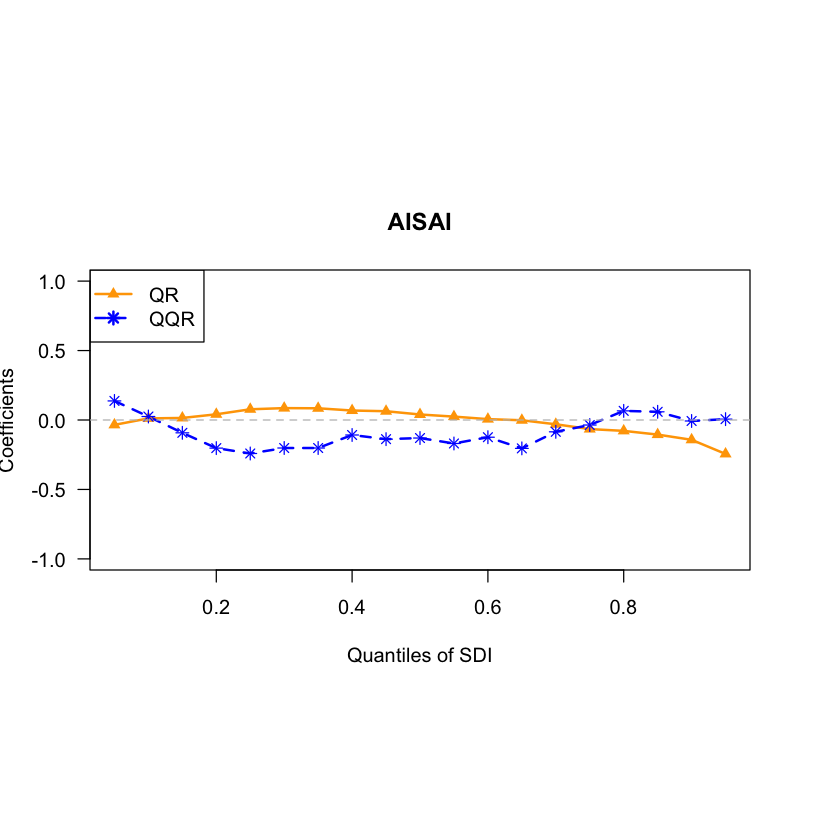

In [22]:
# Checking QQR
min <- min(c(QR.coef, colMeans(QQR.coef)))
max <- max(c(QR.coef, colMeans(QQR.coef)))
par(las = 1) 
par(pin = c(5.5, 2.5))
pdf('/Users/femicind/Documents/Jupyter/16 AI/output/medium_AISAI.pdf', width = 7, height = 5)
par(las = 1) 
par(pin = c(5, 2.5))
plot(taus, QR.coef, type = "l", col = "orange", lwd=2, ylab = "Coefficients", xlab = "Quantiles of SDI", main = "AISAI", ylim = c(-1, 1))
lines(taus, colMeans(QQR.coef), type = "l", lwd=2, lty = 2, col = "blue")
points(taus, QR.coef, pch = 17, col = "orange")
points(taus, colMeans(QQR.coef), pch = 8, col = "blue")
abline(h = 0, col = "gray", lty = 2)
legend("topleft", legend=c("QR", "QQR"), col=c("orange", "blue"), lwd=2, lty = c(1, 2), pch = c(17,8))
dev.off()
plot(taus, QR.coef, type = "l", col = "orange", lwd=2, ylab = "Coefficients", xlab = "Quantiles of SDI", main = "AISAI", ylim = c(-1, 1))
lines(taus, colMeans(QQR.coef), type = "l", lwd=2, lty = 2, col = "blue")
points(taus, QR.coef, pch = 17, col = "orange")
points(taus, colMeans(QQR.coef), pch = 8, col = "blue")
abline(h = 0, col = "gray", lty = 2)
legend("topleft", legend=c("QR", "QQR"), col=c("orange", "blue"), lwd=2, lty = c(1, 2), pch = c(17,8))

#### 长期

In [23]:
### 
data <- read.csv('/Users/femicind/Documents/Jupyter/16 AI/data_long_new.csv')
y <- data$SDI
x <- data$AISAI
z1 <- data$SSEC
z2 <- data$US500
z3 <- data$VIX
# Set quantiles
quantiles <- 0.05 # Set the quantile interval
num <- 1 / quantiles - 1
h <- 0.05 # set the bandwidth
taus <- seq(from = quantiles, to = 1 - quantiles, by = quantiles) 
linear_model <- lm(y ~ x + z1 + z2 + z3, data = data)
summary(linear_model)
taus <- seq(0.05, 0.95, by = 0.05)
quantile_models <- list()
for (tau in taus) {
  model <- rq(y ~ x + z1 + z2 + z3, data = data, tau = tau, method = "br")
  print(summary(model, se = "ker"))
}


Call:
lm(formula = y ~ x + z1 + z2 + z3, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.074593 -0.032377  0.005972  0.024144  0.078991 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.967e-18  1.281e-03   0.000    1.000    
x           2.487e-02  3.016e-03   8.246 5.61e-16 ***
z1          1.159e+00  1.951e-02  59.431  < 2e-16 ***
z2          2.211e-02  1.996e-02   1.108    0.268    
z3          2.506e-02  4.761e-03   5.263 1.76e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03905 on 924 degrees of freedom
Multiple R-squared:  0.8694,	Adjusted R-squared:  0.8689 
F-statistic:  1538 on 4 and 924 DF,  p-value: < 2.2e-16



Call: rq(formula = y ~ x + z1 + z2 + z3, tau = tau, data = data, method = "br")

tau: [1] 0.05

Coefficients:
            Value     Std. Error t value   Pr(>|t|) 
(Intercept)  -0.06023   0.00167  -36.14590   0.00000
x             0.01170   0.00453    2.58462   0.00990
z1            1.34495   0.04325   31.09556   0.00000
z2           -0.20907   0.04191   -4.98886   0.00000
z3            0.01882   0.01448    1.29976   0.19401

Call: rq(formula = y ~ x + z1 + z2 + z3, tau = tau, data = data, method = "br")

tau: [1] 0.1

Coefficients:
            Value     Std. Error t value   Pr(>|t|) 
(Intercept)  -0.05551   0.00193  -28.82793   0.00000
x             0.01605   0.00569    2.82160   0.00488
z1            1.29371   0.05043   25.65366   0.00000
z2           -0.16931   0.05379   -3.14765   0.00170
z3            0.01727   0.01676    1.03040   0.30309

Call: rq(formula = y ~ x + z1 + z2 + z3, tau = tau, data = data, method = "br")

tau: [1] 0.15

Coefficients:
            Value     Std. Error

Cox-Snell Pseudo R² for tau = 0.05 : 0.8736609 
Cox-Snell Pseudo R² for tau = 0.1 : 0.8583083 
Cox-Snell Pseudo R² for tau = 0.15 : 0.8443189 
Cox-Snell Pseudo R² for tau = 0.2 : 0.8360967 
Cox-Snell Pseudo R² for tau = 0.25 : 0.8341913 
Cox-Snell Pseudo R² for tau = 0.3 : 0.8337775 
Cox-Snell Pseudo R² for tau = 0.35 : 0.8350736 
Cox-Snell Pseudo R² for tau = 0.4 : 0.8406771 
Cox-Snell Pseudo R² for tau = 0.45 : 0.8466781 
Cox-Snell Pseudo R² for tau = 0.5 : 0.8519551 
Cox-Snell Pseudo R² for tau = 0.55 : 0.856023 
Cox-Snell Pseudo R² for tau = 0.6 : 0.8594887 
Cox-Snell Pseudo R² for tau = 0.65 : 0.8666911 
Cox-Snell Pseudo R² for tau = 0.7 : 0.8786399 
Cox-Snell Pseudo R² for tau = 0.75 : 0.8922735 
Cox-Snell Pseudo R² for tau = 0.8 : 0.9086838 
Cox-Snell Pseudo R² for tau = 0.85 : 0.9259406 
Cox-Snell Pseudo R² for tau = 0.9 : 0.9440799 
Cox-Snell Pseudo R² for tau = 0.95 : 0.9644322 


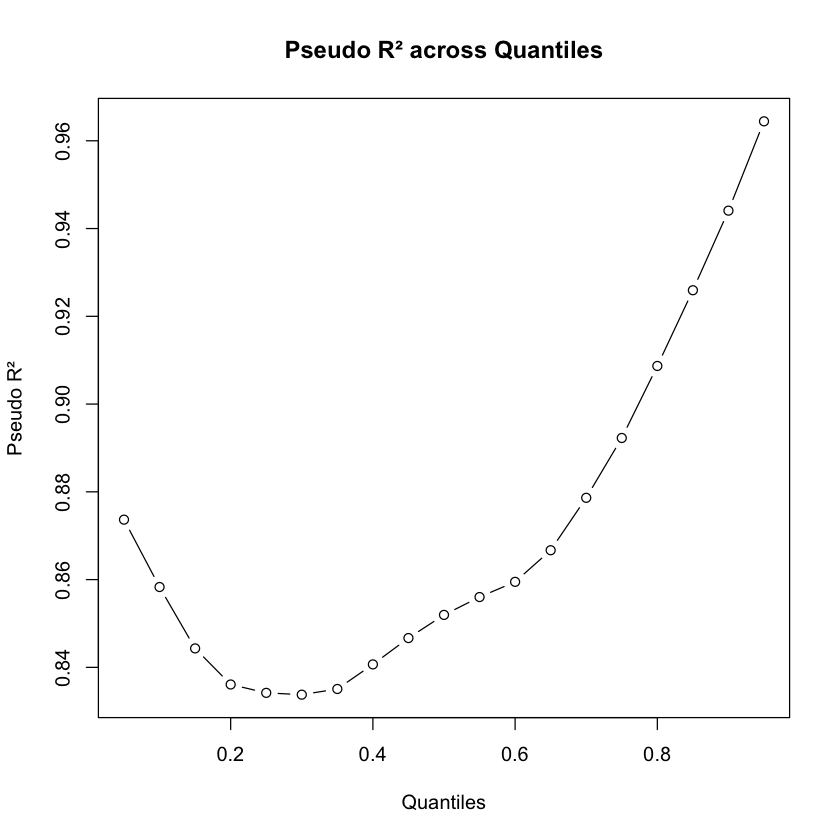

In [24]:
#########_R^2_###########

# 设置分位数
quantiles <- 0.05  # 设置分位数间隔
taus <- seq(from = quantiles, to = 1 - quantiles, by = quantiles)

# 初始化伪 R² 列表
pseudo_r2 <- numeric(length(taus))
n <- nrow(data)  # 样本大小

# 循环遍历每个分位数，拟合分位数回归模型，并计算 Cox-Snell 伪 R²
for (i in seq_along(taus)) {
  tau <- taus[i]
  
  # 拟合分位数回归模型
  model <- rq(y ~ x + z1 + z2 +z3, data = data, tau = tau, method = "br")
  
  # 拟合截距模型（null model）
  null_model <- rq(y ~ 1, data = data, tau = tau)
  
  # 计算似然值
  full_loglik <- logLik(model)
  null_loglik <- logLik(null_model)
  
  # Cox-Snell 伪 R²
  pseudo_r2[i] <- 1 - exp((as.numeric(null_loglik) - as.numeric(full_loglik)) * 2 / n)
  
  # 输出伪 R²
  cat("Cox-Snell Pseudo R² for tau =", tau, ":", pseudo_r2[i], "\n")
}

# 绘制伪 R² 随分位数变化的图
plot(taus, pseudo_r2, type = "b", xlab = "Quantiles", ylab = "Pseudo R²",
     main = "Pseudo R² across Quantiles")
# pdf('/Users/femicind/Documents/Jupyter/15 中国能源/data and code/output/QR/TCIT_R2.pdf', width = 7, height = 5)
# plot(taus, pseudo_r2, type = "b", xlab = "Quantiles", ylab = "Pseudo R²",
#      main = "Pseudo R² across Quantiles")
# dev.off()

In [25]:
QR.coef <- summary(rq(y ~ x + z1 + z2 + z3, tau = taus, ci = F), se = "ker") 
for (i in 1:num){
  QR.coef[[i]] <- QR.coef[[i]]$coefficients
}
QR.pval <- rep(NA, num)
for (i in 1:num){
  QR.pval[i] <- QR.coef[[i]][2,4]
}
QR.coef1 <- rep(NA, num)
for (i in 1:num){
  QR.coef1[i] <- QR.coef[[i]][2,1]
}
QR.coef <- QR.coef1
rm(QR.coef1)
QR.coef

[1]  0.0117031836  0.0160452229  0.0185639454  0.0187351169  0.0201252486
 [6]  0.0222306402  0.0292661019  0.0306706530  0.0293663273  0.0279567747
[11]  0.0280419340  0.0244401665  0.0192916057  0.0134341667  0.0078845974
[16]  0.0030277505 -0.0007926163 -0.0040201568 -0.0065079468

In [26]:
# Add QQR Function
lprq <- function(x, y, z1, z2, z3, m = num, tau = .5) {
  yt <- y
  xt <- x
  z1t <- z1
  z2t <- z2
  z3t <- z3  
  xx <- seq(min(xt), max(xt), length = m)
  pv <- xx
  dv <- xx
  Fn <- xt
  for (i in 1:length(xt)) {
    Fn[i] <- length(which(xt < xt[i])) / length(xt)
  }
  
  for (i in 1:length(xx)) {
    zt <- xt - xx[i]
    wx <-
      dnorm((Fn - taus[i]) / h) # solve the gaussian kernal as the weight
    r <-
      summary(rq(yt ~ zt+z1t+z2t+z3t,
                 weights = wx,
                 tau = tau,
                 ci = F), se = "ker")  # FALSE method = "br",
    pv[i] <- r$coefficients[2, 4]
    dv[i] <- r$coefficients[2, 1]
  }
  list(xx = xx, pv = pv, dv = dv)
}

#Create a matrix to save the QQR estimates
QQR.coef <- as.data.frame(matrix(0, ncol = num, nrow = num))
QQR.pval <- as.data.frame(matrix(0, ncol = num, nrow = num))

# Run QQR in a loop and save estimates in matrix "QQR.coef"
for (i in 1:num) {
  res <- lprq(x = x,
              y = y,
              z1 = z1,
              z2 = z2,
              z3 = z3,
              m = num,
              tau = taus[i])
  QQR.coef[, i] <- res$dv 
  QQR.pval[, i] <- res$pv
}

#Save the QQR results
write.csv(QQR.coef, '/Users/femicind/Documents/Jupyter/16 AI/output/long_coef.csv', row.names = F)
write.csv(QQR.pval, '/Users/femicind/Documents/Jupyter/16 AI/output/long_pval.csv', row.names = F)

pdf 
  2

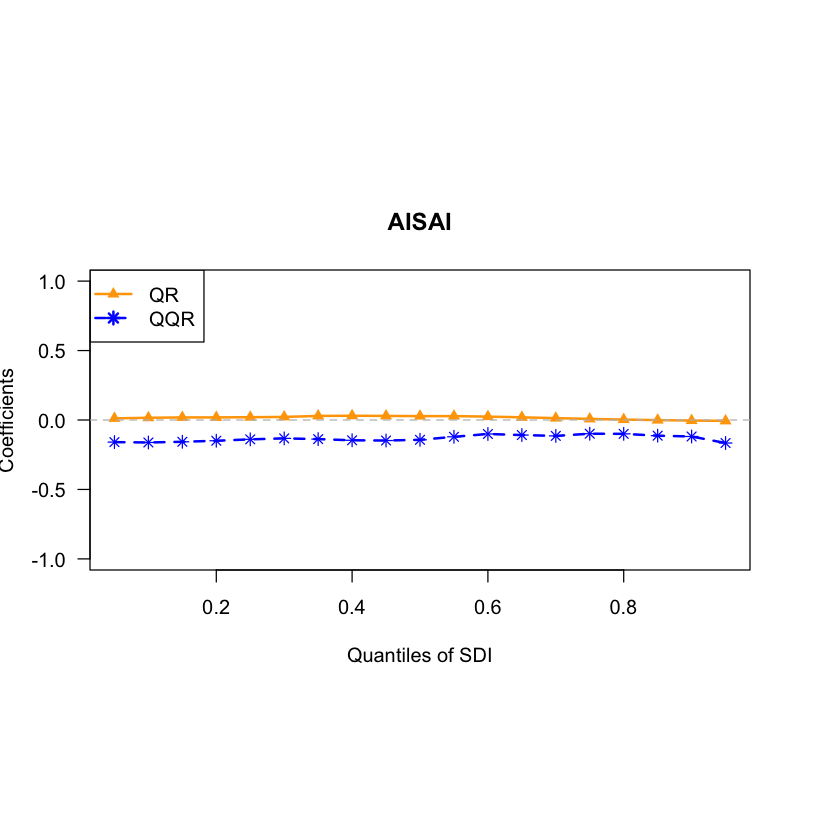

In [28]:
# Checking QQR
min <- min(c(QR.coef, colMeans(QQR.coef)))
max <- max(c(QR.coef, colMeans(QQR.coef)))
par(las = 1) 
par(pin = c(5.5, 2.5))
pdf('/Users/femicind/Documents/Jupyter/16 AI/output/long_AISAI.pdf', width = 7, height = 5)
par(las = 1) 
par(pin = c(5, 2.5))
plot(taus, QR.coef, type = "l", col = "orange", lwd=2, ylab = "Coefficients", xlab = "Quantiles of SDI", main = "AISAI", ylim = c(-1, 1))
lines(taus, colMeans(QQR.coef), type = "l", lwd=2, lty = 2, col = "blue")
points(taus, QR.coef, pch = 17, col = "orange")
points(taus, colMeans(QQR.coef), pch = 8, col = "blue")
abline(h = 0, col = "gray", lty = 2)
legend("topleft", legend=c("QR", "QQR"), col=c("orange", "blue"), lwd=2, lty = c(1, 2), pch = c(17,8))
dev.off()
plot(taus, QR.coef, type = "l", col = "orange", lwd=2, ylab = "Coefficients", xlab = "Quantiles of SDI", main = "AISAI", ylim = c(-1, 1))
lines(taus, colMeans(QQR.coef), type = "l", lwd=2, lty = 2, col = "blue")
points(taus, QR.coef, pch = 17, col = "orange")
points(taus, colMeans(QQR.coef), pch = 8, col = "blue")
abline(h = 0, col = "gray", lty = 2)
legend("topleft", legend=c("QR", "QQR"), col=c("orange", "blue"), lwd=2, lty = c(1, 2), pch = c(17,8))

#### Raw data

In [29]:
### 
data <- read.csv('/Users/femicind/Documents/Jupyter/16 AI/data.csv')
y <- data$SDI
x <- data$AISAI
z1 <- data$SSEC
z2 <- data$US500
z3 <- data$VIX
# Set quantiles
quantiles <- 0.05 # Set the quantile interval
num <- 1 / quantiles - 1
h <- 0.05 # set the bandwidth
taus <- seq(from = quantiles, to = 1 - quantiles, by = quantiles) 
linear_model <- lm(y ~ x + z1 + z2 + z3, data = data)
summary(linear_model)
taus <- seq(0.05, 0.95, by = 0.05)
quantile_models <- list()
for (tau in taus) {
  model <- rq(y ~ x + z1 + z2 + z3, data = data, tau = tau, method = "br")
  print(summary(model, se = "ker"))
}


Call:
lm(formula = y ~ x + z1 + z2 + z3, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.49972 -0.30362 -0.02765  0.27290  2.39245 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0170332  0.0155301  -1.097    0.273    
x            0.0228109  0.0251140   0.908    0.364    
z1           1.0684153  0.0153248  69.718   <2e-16 ***
z2          -0.0130338  0.0221590  -0.588    0.557    
z3          -0.0006637  0.0031379  -0.211    0.833    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4729 on 924 degrees of freedom
Multiple R-squared:  0.8411,	Adjusted R-squared:  0.8405 
F-statistic:  1223 on 4 and 924 DF,  p-value: < 2.2e-16



Call: rq(formula = y ~ x + z1 + z2 + z3, tau = tau, data = data, method = "br")

tau: [1] 0.05

Coefficients:
            Value     Std. Error t value   Pr(>|t|) 
(Intercept)  -0.72183   0.02490  -28.99132   0.00000
x             0.07507   0.03775    1.98855   0.04705
z1            1.10717   0.02304   48.05448   0.00000
z2           -0.01933   0.03026   -0.63902   0.52297
z3           -0.00080   0.00445   -0.17971   0.85742

Call: rq(formula = y ~ x + z1 + z2 + z3, tau = tau, data = data, method = "br")

tau: [1] 0.1

Coefficients:
            Value     Std. Error t value   Pr(>|t|) 
(Intercept)  -0.58943   0.02427  -24.28244   0.00000
x             0.07930   0.03552    2.23229   0.02583
z1            1.09157   0.02913   37.47115   0.00000
z2           -0.00950   0.03001   -0.31654   0.75167
z3            0.00059   0.00364    0.16141   0.87181

Call: rq(formula = y ~ x + z1 + z2 + z3, tau = tau, data = data, method = "br")

tau: [1] 0.15

Coefficients:
            Value     Std. Error

Cox-Snell Pseudo R² for tau = 0.05 : 0.8706631 
Cox-Snell Pseudo R² for tau = 0.1 : 0.8447135 
Cox-Snell Pseudo R² for tau = 0.15 : 0.8314352 
Cox-Snell Pseudo R² for tau = 0.2 : 0.8256995 
Cox-Snell Pseudo R² for tau = 0.25 : 0.8214517 
Cox-Snell Pseudo R² for tau = 0.3 : 0.8193151 
Cox-Snell Pseudo R² for tau = 0.35 : 0.8192775 
Cox-Snell Pseudo R² for tau = 0.4 : 0.8206353 
Cox-Snell Pseudo R² for tau = 0.45 : 0.8206846 
Cox-Snell Pseudo R² for tau = 0.5 : 0.8191481 
Cox-Snell Pseudo R² for tau = 0.55 : 0.8182468 
Cox-Snell Pseudo R² for tau = 0.6 : 0.8176602 
Cox-Snell Pseudo R² for tau = 0.65 : 0.8167636 
Cox-Snell Pseudo R² for tau = 0.7 : 0.8177814 
Cox-Snell Pseudo R² for tau = 0.75 : 0.8193256 
Cox-Snell Pseudo R² for tau = 0.8 : 0.8208517 
Cox-Snell Pseudo R² for tau = 0.85 : 0.822294 
Cox-Snell Pseudo R² for tau = 0.9 : 0.8261477 
Cox-Snell Pseudo R² for tau = 0.95 : 0.8420273 


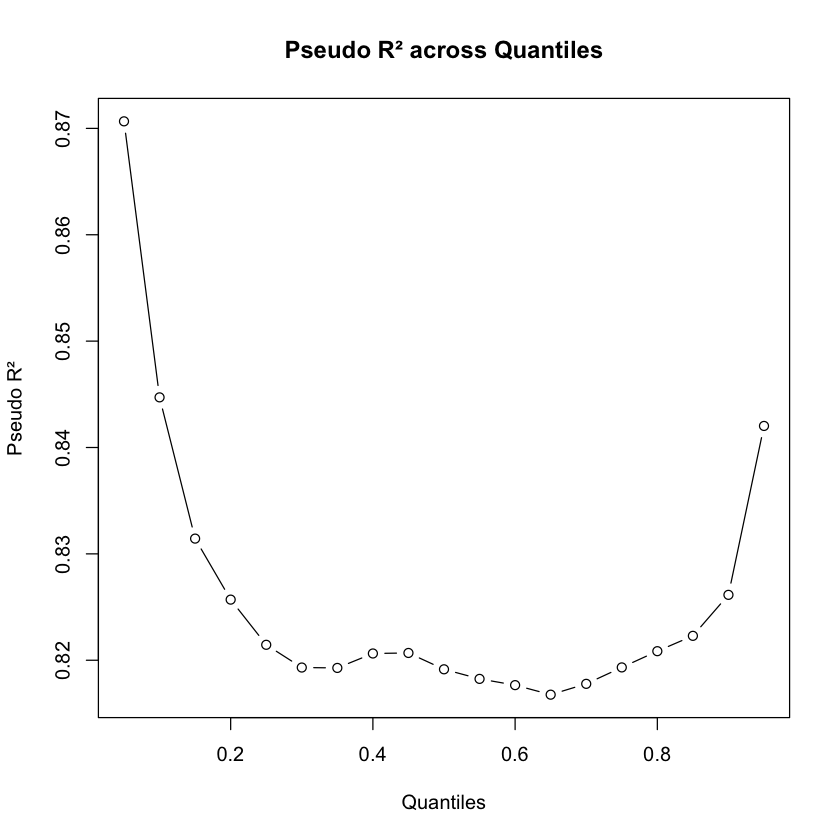

In [30]:
#########_R^2_###########

# 设置分位数
quantiles <- 0.05  # 设置分位数间隔
taus <- seq(from = quantiles, to = 1 - quantiles, by = quantiles)

# 初始化伪 R² 列表
pseudo_r2 <- numeric(length(taus))
n <- nrow(data)  # 样本大小

# 循环遍历每个分位数，拟合分位数回归模型，并计算 Cox-Snell 伪 R²
for (i in seq_along(taus)) {
  tau <- taus[i]
  
  # 拟合分位数回归模型
  model <- rq(y ~ x + z1 + z2 +z3, data = data, tau = tau, method = "br")
  
  # 拟合截距模型（null model）
  null_model <- rq(y ~ 1, data = data, tau = tau)
  
  # 计算似然值
  full_loglik <- logLik(model)
  null_loglik <- logLik(null_model)
  
  # Cox-Snell 伪 R²
  pseudo_r2[i] <- 1 - exp((as.numeric(null_loglik) - as.numeric(full_loglik)) * 2 / n)
  
  # 输出伪 R²
  cat("Cox-Snell Pseudo R² for tau =", tau, ":", pseudo_r2[i], "\n")
}

# 绘制伪 R² 随分位数变化的图
plot(taus, pseudo_r2, type = "b", xlab = "Quantiles", ylab = "Pseudo R²",
     main = "Pseudo R² across Quantiles")
# pdf('/Users/femicind/Documents/Jupyter/15 中国能源/data and code/output/QR/TCIT_R2.pdf', width = 7, height = 5)
# plot(taus, pseudo_r2, type = "b", xlab = "Quantiles", ylab = "Pseudo R²",
#      main = "Pseudo R² across Quantiles")
# dev.off()

In [31]:
QR.coef <- summary(rq(y ~ x + z1 + z2 + z3, tau = taus, ci = F), se = "ker") 
for (i in 1:num){
  QR.coef[[i]] <- QR.coef[[i]]$coefficients
}
QR.pval <- rep(NA, num)
for (i in 1:num){
  QR.pval[i] <- QR.coef[[i]][2,4]
}
QR.coef1 <- rep(NA, num)
for (i in 1:num){
  QR.coef1[i] <- QR.coef[[i]][2,1]
}
QR.coef <- QR.coef1
rm(QR.coef1)
QR.coef

[1]  0.075074223  0.079296655  0.072181785  0.035249109  0.022406824
 [6]  0.007025578 -0.001234515  0.007951469  0.001946272 -0.003603463
[11]  0.006443849  0.020766963  0.008976400  0.018901961  0.022839703
[16]  0.014664961 -0.010926054  0.010672491 -0.009687818

In [32]:
# Add QQR Function
lprq <- function(x, y, z1, z2, z3, m = num, tau = .5) {
  yt <- y
  xt <- x
  z1t <- z1
  z2t <- z2
  z3t <- z3  
  xx <- seq(min(xt), max(xt), length = m)
  pv <- xx
  dv <- xx
  Fn <- xt
  for (i in 1:length(xt)) {
    Fn[i] <- length(which(xt < xt[i])) / length(xt)
  }
  
  for (i in 1:length(xx)) {
    zt <- xt - xx[i]
    wx <-
      dnorm((Fn - taus[i]) / h) # solve the gaussian kernal as the weight
    r <-
      summary(rq(yt ~ zt+z1t+z2t+z3t,
                 weights = wx,
                 tau = tau,
                 ci = F), se = "ker")  # FALSE method = "br",
    pv[i] <- r$coefficients[2, 4]
    dv[i] <- r$coefficients[2, 1]
  }
  list(xx = xx, pv = pv, dv = dv)
}

#Create a matrix to save the QQR estimates
QQR.coef <- as.data.frame(matrix(0, ncol = num, nrow = num))
QQR.pval <- as.data.frame(matrix(0, ncol = num, nrow = num))

# Run QQR in a loop and save estimates in matrix "QQR.coef"
for (i in 1:num) {
  res <- lprq(x = x,
              y = y,
              z1 = z1,
              z2 = z2,
              z3 = z3,
              m = num,
              tau = taus[i])
  QQR.coef[, i] <- res$dv 
  QQR.pval[, i] <- res$pv
}

#Save the QQR results
write.csv(QQR.coef, '/Users/femicind/Documents/Jupyter/16 AI/output/raw_coef.csv', row.names = F)
write.csv(QQR.pval, '/Users/femicind/Documents/Jupyter/16 AI/output/raw_pval.csv', row.names = F)

pdf 
  2

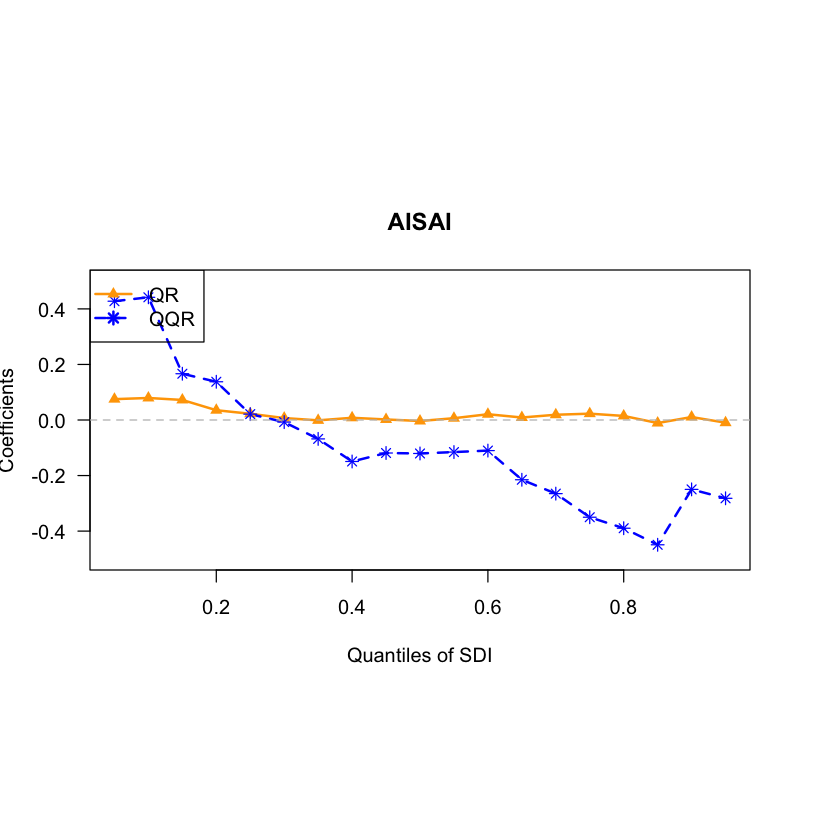

In [33]:
# Checking QQR
min <- min(c(QR.coef, colMeans(QQR.coef)))
max <- max(c(QR.coef, colMeans(QQR.coef)))
par(las = 1) 
par(pin = c(5.5, 2.5))
pdf('/Users/femicind/Documents/Jupyter/16 AI/output/raw_AISAI.pdf', width = 7, height = 5)
par(las = 1) 
par(pin = c(5, 2.5))
plot(taus, QR.coef, type = "l", col = "orange", lwd=2, ylab = "Coefficients", xlab = "Quantiles of SDI", main = "AISAI", ylim = c(-0.5, 0.5))
lines(taus, colMeans(QQR.coef), type = "l", lwd=2, lty = 2, col = "blue")
points(taus, QR.coef, pch = 17, col = "orange")
points(taus, colMeans(QQR.coef), pch = 8, col = "blue")
abline(h = 0, col = "gray", lty = 2)
legend("topleft", legend=c("QR", "QQR"), col=c("orange", "blue"), lwd=2, lty = c(1, 2), pch = c(17,8))
dev.off()
plot(taus, QR.coef, type = "l", col = "orange", lwd=2, ylab = "Coefficients", xlab = "Quantiles of SDI", main = "AISAI", ylim = c(-0.5, 0.5))
lines(taus, colMeans(QQR.coef), type = "l", lwd=2, lty = 2, col = "blue")
points(taus, QR.coef, pch = 17, col = "orange")
points(taus, colMeans(QQR.coef), pch = 8, col = "blue")
abline(h = 0, col = "gray", lty = 2)
legend("topleft", legend=c("QR", "QQR"), col=c("orange", "blue"), lwd=2, lty = c(1, 2), pch = c(17,8))

#### Robustness

In [40]:
data <- read.csv('/Users/femicind/Documents/Jupyter/16 AI/Robustness/data_AISAI_waveslim.csv')
max_sca <- floor(log(nrow(data), 2))
paste0("The maximum number of scales for your data is: ", max_sca)

[1] "The maximum number of scales for your data is: 9"

In [41]:
scales <- 9 # 不超过 max_sca
short <- c(1,2,3)  # 短期成分
medium <- c(4,5,6)
long <- c(7,8,9)   # 长期成分

In [42]:
w_data <- list(NULL)
for (i in 1:(scales + 1)){
  w_data[[i]] <- data
}
for (i in 1:ncol(data)){
  mra.out <- mra(as.numeric(data[,i]), J = scales, boundary = "periodic", method = "modwt")
  for (j in 1:(scales + 1)){
    w_data[[j]][,i] <- matrix(unlist(mra.out), nrow(data))[,j]
  }
}
rm(mra.out)
w_data

SDI,AISAI,SSEC,US500,VIX
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.81932190,-7.844664e-01,-0.73628078,0.34221982,-2.05819746
-0.09089123,1.597058e-01,-0.26997126,-0.49699910,0.08327795
0.97101238,1.538966e-01,1.04913935,0.35278571,2.06283211
0.02040380,-3.529599e-02,-0.25660195,-0.32830770,-1.66397839
-1.33226837,-3.351894e-02,-0.83820664,0.27104801,0.86287940
0.97245664,3.971964e-03,0.75820055,-0.30890708,0.86579473
-0.23727632,3.663886e-03,-0.28848123,0.68468008,-5.46676536
0.92980810,1.064863e-04,0.63093322,-0.83450859,7.86980422
-2.09118443,1.704014e-04,-1.39697882,0.14141546,-1.51801036


In [43]:
if (length(short) == 1){
  data1 <- w_data[[short]]
} else {
  data1 <- w_data[[short[1]]]
  for (i in 2:length(short)){
    data1 <- data1 + w_data[[short[i]]]
  }
}
write.csv(data1,'/Users/femicind/Documents/Jupyter/16 AI/Robustness/data_AISAI_short.csv')

In [44]:
if (length(medium) == 1){
  data2 <- w_data[[medium]]
} else {
  data2 <- w_data[[medium[1]]]
  for (i in 2:length(medium)){
    data2 <- data2 + w_data[[medium[i]]]
  }
}
write.csv(data2,'/Users/femicind/Documents/Jupyter/16 AI/Robustness/data_AISAI_medium.csv')

In [45]:
if (length(long) == 1){
  data3 <- w_data[[long]]
} else {
  data3 <- w_data[[long[1]]]
  for (i in 2:length(long)){
    data3 <- data3 + w_data[[long[i]]]
  }
}
write.csv(data3,'/Users/femicind/Documents/Jupyter/16 AI/Robustness/data_AISAI_long.csv')

#### 检验

In [62]:
### 
data <- read.csv('/Users/femicind/Documents/Jupyter/16 AI/Robustness/data_AISAI_long.csv')
y <- data$SDI
x <- data$AISAI
z1 <- data$SSEC
z2 <- data$US500
z3 <- data$VIX
# Set quantiles
quantiles <- 0.05 # Set the quantile interval
num <- 1 / quantiles - 1
h <- 0.05 # set the bandwidth
taus <- seq(from = quantiles, to = 1 - quantiles, by = quantiles) 
linear_model <- lm(y ~ x + z1 + z2 + z3, data = data)
summary(linear_model)
taus <- seq(0.05, 0.95, by = 0.05)
quantile_models <- list()
for (tau in taus) {
  model <- rq(y ~ x + z1 + z2 + z3, data = data, tau = tau, method = "br")
  print(summary(model, se = "ker"))
}


Call:
lm(formula = y ~ x + z1 + z2 + z3, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.078824 -0.033635  0.004517  0.029481  0.075413 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.107e-18  1.309e-03   0.000    1.000    
x           1.034e-02  1.995e-03   5.185 2.66e-07 ***
z1          1.192e+00  1.923e-02  61.961  < 2e-16 ***
z2          2.566e-02  2.055e-02   1.248    0.212    
z3          2.768e-02  4.875e-03   5.677 1.83e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03988 on 924 degrees of freedom
Multiple R-squared:  0.8638,	Adjusted R-squared:  0.8632 
F-statistic:  1465 on 4 and 924 DF,  p-value: < 2.2e-16



Call: rq(formula = y ~ x + z1 + z2 + z3, tau = tau, data = data, method = "br")

tau: [1] 0.05

Coefficients:
            Value     Std. Error t value   Pr(>|t|) 
(Intercept)  -0.06023   0.00160  -37.57227   0.00000
x             0.00813   0.00207    3.92620   0.00009
z1            1.32276   0.03631   36.42578   0.00000
z2           -0.21755   0.03782   -5.75182   0.00000
z3            0.00762   0.01441    0.52867   0.59716

Call: rq(formula = y ~ x + z1 + z2 + z3, tau = tau, data = data, method = "br")

tau: [1] 0.1

Coefficients:
            Value     Std. Error t value   Pr(>|t|) 
(Intercept)  -0.05586   0.00191  -29.30068   0.00000
x             0.00954   0.00252    3.79441   0.00016
z1            1.29244   0.04103   31.49918   0.00000
z2           -0.17886   0.04735   -3.77758   0.00017
z3            0.00921   0.01564    0.58921   0.55587

Call: rq(formula = y ~ x + z1 + z2 + z3, tau = tau, data = data, method = "br")

tau: [1] 0.15

Coefficients:
            Value     Std. Error

Cox-Snell Pseudo R² for tau = 0.05 : 0.8750145 
Cox-Snell Pseudo R² for tau = 0.1 : 0.8587924 
Cox-Snell Pseudo R² for tau = 0.15 : 0.8439189 
Cox-Snell Pseudo R² for tau = 0.2 : 0.8348074 
Cox-Snell Pseudo R² for tau = 0.25 : 0.8307535 
Cox-Snell Pseudo R² for tau = 0.3 : 0.8283977 
Cox-Snell Pseudo R² for tau = 0.35 : 0.8269544 
Cox-Snell Pseudo R² for tau = 0.4 : 0.8293592 
Cox-Snell Pseudo R² for tau = 0.45 : 0.8334242 
Cox-Snell Pseudo R² for tau = 0.5 : 0.8377364 
Cox-Snell Pseudo R² for tau = 0.55 : 0.8424615 
Cox-Snell Pseudo R² for tau = 0.6 : 0.8497866 
Cox-Snell Pseudo R² for tau = 0.65 : 0.8616566 
Cox-Snell Pseudo R² for tau = 0.7 : 0.8769416 
Cox-Snell Pseudo R² for tau = 0.75 : 0.8926164 
Cox-Snell Pseudo R² for tau = 0.8 : 0.9100543 
Cox-Snell Pseudo R² for tau = 0.85 : 0.9275932 
Cox-Snell Pseudo R² for tau = 0.9 : 0.9454992 
Cox-Snell Pseudo R² for tau = 0.95 : 0.965604 


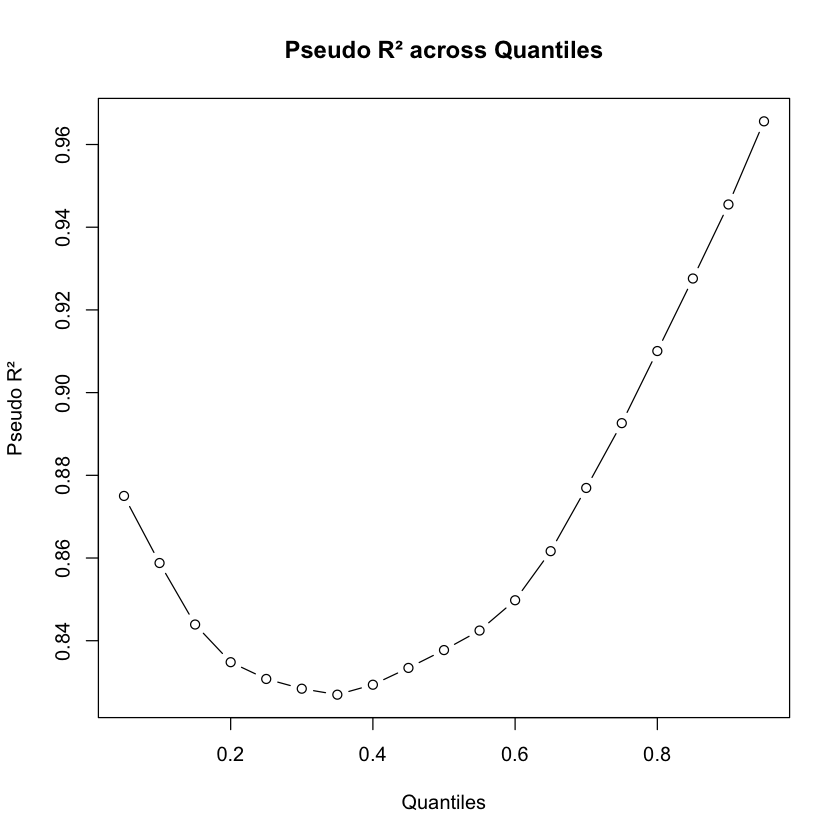

In [63]:
#########_R^2_###########

# 设置分位数
quantiles <- 0.05  # 设置分位数间隔
taus <- seq(from = quantiles, to = 1 - quantiles, by = quantiles)

# 初始化伪 R² 列表
pseudo_r2 <- numeric(length(taus))
n <- nrow(data)  # 样本大小

# 循环遍历每个分位数，拟合分位数回归模型，并计算 Cox-Snell 伪 R²
for (i in seq_along(taus)) {
  tau <- taus[i]
  
  # 拟合分位数回归模型
  model <- rq(y ~ x + z1 + z2 +z3, data = data, tau = tau, method = "br")
  
  # 拟合截距模型（null model）
  null_model <- rq(y ~ 1, data = data, tau = tau)
  
  # 计算似然值
  full_loglik <- logLik(model)
  null_loglik <- logLik(null_model)
  
  # Cox-Snell 伪 R²
  pseudo_r2[i] <- 1 - exp((as.numeric(null_loglik) - as.numeric(full_loglik)) * 2 / n)
  
  # 输出伪 R²
  cat("Cox-Snell Pseudo R² for tau =", tau, ":", pseudo_r2[i], "\n")
}

# 绘制伪 R² 随分位数变化的图
plot(taus, pseudo_r2, type = "b", xlab = "Quantiles", ylab = "Pseudo R²",
     main = "Pseudo R² across Quantiles")
# pdf('/Users/femicind/Documents/Jupyter/15 中国能源/data and code/output/QR/TCIT_R2.pdf', width = 7, height = 5)
# plot(taus, pseudo_r2, type = "b", xlab = "Quantiles", ylab = "Pseudo R²",
#      main = "Pseudo R² across Quantiles")
# dev.off()

In [64]:
QR.coef <- summary(rq(y ~ x + z1 + z2 + z3, tau = taus, ci = F), se = "ker") 
for (i in 1:num){
  QR.coef[[i]] <- QR.coef[[i]]$coefficients
}
QR.pval <- rep(NA, num)
for (i in 1:num){
  QR.pval[i] <- QR.coef[[i]][2,4]
}
QR.coef1 <- rep(NA, num)
for (i in 1:num){
  QR.coef1[i] <- QR.coef[[i]][2,1]
}
QR.coef <- QR.coef1
rm(QR.coef1)
QR.coef

[1]  0.008125702  0.009543393  0.009765834  0.009421901  0.007150497
 [6]  0.005153769  0.004213075  0.004311328  0.004538904  0.002445892
[11] -0.002459904  0.001580622 -0.003420200 -0.007216890 -0.009842756
[16] -0.011086247 -0.012054384 -0.011319443 -0.010508283

In [65]:
# Add QQR Function
lprq <- function(x, y, z1, z2, z3, m = num, tau = .5) {
  yt <- y
  xt <- x
  z1t <- z1
  z2t <- z2
  z3t <- z3  
  xx <- seq(min(xt), max(xt), length = m)
  pv <- xx
  dv <- xx
  Fn <- xt
  for (i in 1:length(xt)) {
    Fn[i] <- length(which(xt < xt[i])) / length(xt)
  }
  
  for (i in 1:length(xx)) {
    zt <- xt - xx[i]
    wx <-
      dnorm((Fn - taus[i]) / h) # solve the gaussian kernal as the weight
    r <-
      summary(rq(yt ~ zt+z1t+z2t+z3t,
                 weights = wx,
                 tau = tau,
                 ci = F), se = "ker")  # FALSE method = "br",
    pv[i] <- r$coefficients[2, 4]
    dv[i] <- r$coefficients[2, 1]
  }
  list(xx = xx, pv = pv, dv = dv)
}

#Create a matrix to save the QQR estimates
QQR.coef <- as.data.frame(matrix(0, ncol = num, nrow = num))
QQR.pval <- as.data.frame(matrix(0, ncol = num, nrow = num))

# Run QQR in a loop and save estimates in matrix "QQR.coef"
for (i in 1:num) {
  res <- lprq(x = x,
              y = y,
              z1 = z1,
              z2 = z2,
              z3 = z3,
              m = num,
              tau = taus[i])
  QQR.coef[, i] <- res$dv 
  QQR.pval[, i] <- res$pv
}

#Save the QQR results
write.csv(QQR.coef, '/Users/femicind/Documents/Jupyter/16 AI/Robustness/AISAI_long_coef.csv', row.names = F)
write.csv(QQR.pval, '/Users/femicind/Documents/Jupyter/16 AI/Robustness/AISAI_long_pval.csv', row.names = F)

pdf 
  2

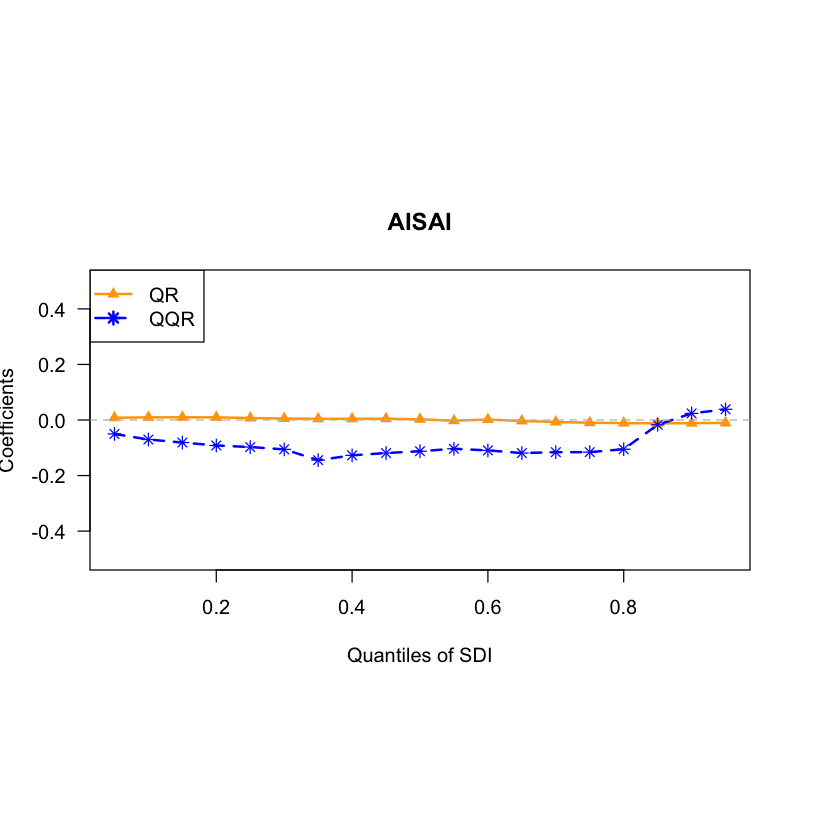

In [66]:
# Checking QQR
min <- min(c(QR.coef, colMeans(QQR.coef)))
max <- max(c(QR.coef, colMeans(QQR.coef)))
par(las = 1) 
par(pin = c(5.5, 2.5))
pdf('/Users/femicind/Documents/Jupyter/16 AI/Robustness/AISAI_long.pdf', width = 7, height = 5)
par(las = 1) 
par(pin = c(5, 2.5))
plot(taus, QR.coef, type = "l", col = "orange", lwd=2, ylab = "Coefficients", xlab = "Quantiles of SDI", main = "AISAI", ylim = c(-0.5, 0.5))
lines(taus, colMeans(QQR.coef), type = "l", lwd=2, lty = 2, col = "blue")
points(taus, QR.coef, pch = 17, col = "orange")
points(taus, colMeans(QQR.coef), pch = 8, col = "blue")
abline(h = 0, col = "gray", lty = 2)
legend("topleft", legend=c("QR", "QQR"), col=c("orange", "blue"), lwd=2, lty = c(1, 2), pch = c(17,8))
dev.off()
plot(taus, QR.coef, type = "l", col = "orange", lwd=2, ylab = "Coefficients", xlab = "Quantiles of SDI", main = "AISAI", ylim = c(-0.5, 0.5))
lines(taus, colMeans(QQR.coef), type = "l", lwd=2, lty = 2, col = "blue")
points(taus, QR.coef, pch = 17, col = "orange")
points(taus, colMeans(QQR.coef), pch = 8, col = "blue")
abline(h = 0, col = "gray", lty = 2)
legend("topleft", legend=c("QR", "QQR"), col=c("orange", "blue"), lwd=2, lty = c(1, 2), pch = c(17,8))